# Life Satisfaction and Political Views in Eastern Bloc Versus Western Europe

This notebook is the first of five that together form the Project. In this notebook, we do replications of existing claims and their underlying results regarding life satisfaction and political views in the Eastern Bloc compared with those in Western Europe, see if life satisfaction and political views are related, before investigating other variables behind life satisfaction levels, using Uzbekistan as a case in point.

This Project came about in response to a 2016 article by The Guardian (https://www.theguardian.com/world/2016/dec/14/unhappy-russians-nostalgic-for-soviet-style-rule-study), which reported that Eastern Europe lagged behind Western Europe in terms of happiness and that a majority of respondents from ex-Soviet states agreed that authoritarianism is sometimes preferable to democracy. We were intrigued by these findings; in particular, we did not expect support for authoritarianism to run higher than for democracy in some places.

The article cited the European Bank of Reconstruction and Development (EBRD), from whose dataset these conclusions were made. Specifically, the data are the responses from the third and latest Life in Transition Survey (LiTS III; EBRD, 2016), which can be found in DTA format (16MB) at https://www.ebrd.com/what-we-do/economic-research-and-data/data/lits.html. These surveys are carried out by the EBRD to evaluate its work of helping former Eastern Bloc countries to transition to open-market economies following the fall of the Soviet Union in 1991 (https://www.ebrd.com/who-we-are/history-of-the-ebrd.html). The LiTS III surveyed over 51,000 households across 34 countries, from Albania to Uzbekistan, and included Germany and Italy as two Western European comparator countries. It covered topics as diverse as employment, assets, values, and political views. The EBRD also published its own Life in Transition (LiT) III Report based on these data.

Our initial aims for this Project were: to replicate the life satisfaction and political views data across countries and between the Eastern Bloc and Western Europe; test if life satisfaction and views on authoritarianism were linked; and investigate what other factors could be behind the life satisfaction and political views results.

## Replication
## a) Life Satisfaction

In the first part of this project, we attempt to replicate the life satisfaction results by country and region that were stated in the LiT III Report. The EBRD refers to the 32 countries that are not Germany or Italy as the "transition region", which broadly maps onto Eastern Europe, but also extends to Central Asia and countries such as Greece and Cyprus. Where the EBRD refers to the "transition region", we will sometimes employ the more well-known term "Eastern Bloc", which acknowledges the various historical, economic, and political ties of most of these countries.

In the LiT III Report, life satisfaction in a country was defined as the percentage of respondents in that country who either "agree" or "strongly agree" with the statement "all things considered, I am satisfied with my life now" (EBRD, 2016, p. 12). Each response was survey-weighted; regional averages are "simple averages of the country scores" (ibid.). In the report, the life satisfaction levels were presented in a bar chart and reported in individual country profiles. Below is the bar chart.

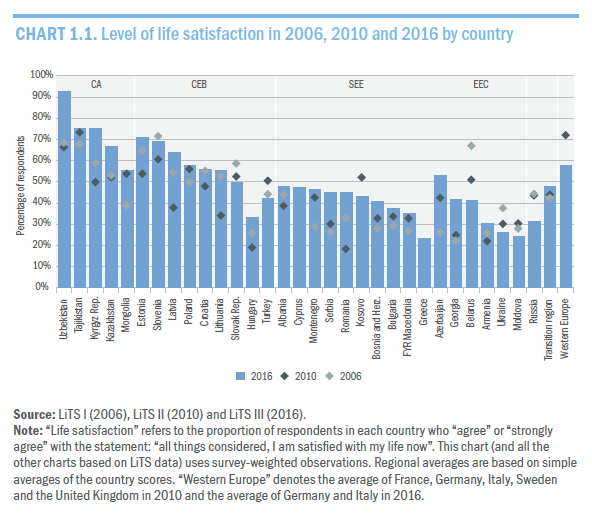

In [1]:
from IPython.display import Image
# life_satisfaction_orig_chart = Image("Life Satisfaction Chart.png")
life_satisfaction_orig_chart = Image("./data/Life Satisfaction Chart.png") # linux - repo folder
life_satisfaction_orig_chart

Figure 1. Level of life satisfaction bar chart from LiT III Report (EBRD, 2016, p. 12).

And below we build a dataframe with the life satisfaction levels as gleaned from the individual country profiles and/or the above chart, rounded to 2 sf. These are the life satisfaction data that we will try to replicate. Note. The life satisfaction result for the Czech Republic was not stated in the report. 

In [2]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', 'raise')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Suppress warning about mixed data types in columns
import warnings
warnings.filterwarnings('ignore')

To build the dataframe, region definitions used in the report are given.

In [3]:
# Define regions used in the report.

# Firstly, is it a transition country or not?
# The "transition region" as defined in the LiTS III Report. This includes Cyprus, Greece, and Turkey, which are not seen as historically part of the Eastern Bloc. This definition of "transition region" is used for the purposes of replication.
transition = ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herz.', 'Bulgaria', 'Croatia', 'Cyprus', 'Estonia', 'FYR Macedonia', 'Georgia', 'Greece', 'Hungary', 'Kazakhstan', 'Kosovo', 'Kyrgyz Rep.', 'Latvia', 'Lithuania', 'Moldova', 'Mongolia', 'Montenegro', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovak Rep.', 'Slovenia', 'Tajikistan', 'Turkey', 'Ukraine', 'Uzbekistan']

# And secondly, which region does it belong to?
# Countries of Central Asia (CA)
ca = ['Uzbekistan', 'Tajikistan', 'Kyrgyz Rep.', 'Kazakhstan', 'Mongolia']
# Countries in central Europe and the Baltic states (CEB)
ceb = ['Estonia', 'Slovenia', 'Latvia', 'Poland', 'Croatia', 'Lithuania', 'Slovak Rep.', 'Hungary']
# Countries in south-eastern Europe (SEE)
see = ['Albania', 'Cyprus', 'Montenegro', 'Serbia', 'Romania', 'Kosovo', 'Bosnia and Herz.', 'Bulgaria', 'FYR Macedonia', 'Greece']
# Countries in eastern Europe and the Caucasus (EEC)
eec = ['Azerbaijan', 'Georgia', 'Belarus', 'Armenia', 'Ukraine', 'Moldova']
# A couple of western European countries for comparison
we = ['Germany', 'Italy']
# Standalone countries
standalone = ['Czech Rep.', 'Russia', 'Turkey']

And recoding functions are defined using the above region definitions.

In [4]:
def transition_recoder(country):
    """ Return a boolean for whether a country is in the transition region or not.
    
    Parameters
    ----------
    country : string
        The country for which it is to be determined whether it is in the transition region or not.
    
    Returns
    -------
    in_transition : boolean
        Whether the country is in the transition region or not.
    """
    
    if country in transition:
        in_transition = True
    else:
        in_transition = False
    
    return in_transition

In [5]:
def region_recoder(country):
    """ Return a string that represents the region in which a country is located.
    
    Parameters
    ----------
    country : string
        The country whose region is to be determined.
    
    Returns
    -------
    region : string
        The region of the country.
    """
    
    
    if country in ca:
        region = 'C Asia'
    elif country in ceb:
        region = 'C Europe & Baltics'
    elif country in see:
        region = 'SE Europe'
    elif country in eec:
        region = 'E Europe & Caucasus'
    elif country in we:
        region = 'W Europe'
    elif country in standalone:
        region = country
    
    return region

In [6]:
# The names of the 33 countries for which there are life satisfaction data.
all_countries = ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herz.', 'Bulgaria', 'Croatia', 'Cyprus', 'Estonia', 'FYR Macedonia', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Italy', 'Kazakhstan', 'Kosovo', 'Kyrgyz Rep.', 'Latvia', 'Lithuania', 'Moldova', 'Mongolia', 'Montenegro', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovak Rep.', 'Slovenia', 'Tajikistan', 'Turkey', 'Ukraine', 'Uzbekistan']

In [7]:
# Build the dataframe with the data to be replicated.
original_satisfaction = pd.DataFrame()
original_satisfaction['Country'] = all_countries
original_satisfaction['Transition'] = original_satisfaction['Country'].apply(transition_recoder)
original_satisfaction['Region'] = original_satisfaction['Country'].apply(region_recoder)
original_satisfaction['Life Satisfaction (%)'] = [48, 30, 53, 41, 40, 37, 56, 48, 71, 35, 42, 73, 24, 33, 43, 67, 43, 75, 64, 56, 24, 55, 46, 58, 45, 32, 46, 50, 69, 75, 42, 26, 93]
original_satisfaction

,Country,Transition,Region,Life Satisfaction (%)
0,Albania,True,SE Europe,48
1,Armenia,True,E Europe & Caucasus,30
2,Azerbaijan,True,E Europe & Caucasus,53
3,Belarus,True,E Europe & Caucasus,41
4,Bosnia and Herz.,True,SE Europe,40
5,Bulgaria,True,SE Europe,37
6,Croatia,True,C Europe & Baltics,56
7,Cyprus,True,SE Europe,48
8,Estonia,True,C Europe & Baltics,71
9,FYR Macedonia,True,SE Europe,35


Table 1. The original mean life satisfaction values for each country.

Now we calculate the mean life satisfactions for the transition and Western European regions.

In [8]:
# Calculate the mean life satisfaction in the transition region.
transition_original_satisfaction = np.mean(original_satisfaction[original_satisfaction['Transition'] == True]['Life Satisfaction (%)'])
print('Transition region life satisfaction: ' + str(round(transition_original_satisfaction)) + '%')

Transition region life satisfaction: 49%


In [9]:
# Calculate the mean life satisfaction in Western Europe.
w_europe_original_satisfaction = np.mean(original_satisfaction[original_satisfaction['Region'] == 'W Europe']['Life Satisfaction (%)'])
print('Western Europe life satisfaction: ' + str(round(w_europe_original_satisfaction)) + '%')

Western Europe life satisfaction: 58%


## Replication of the life satisfaction data

For replication, we load the original data from a .csv file. "Weight 1" refers to the weight of a respondent's answers as a proportion of 1, where 1 represents the total weight of a country's respondents. Note. The total country weight does not always sum to 1 due to a precision cut-off in the .csv file.

In [10]:
# Extract the the zipped csv data
#import zipfile
#with zipfile.ZipFile("./data/LiTS_III_2016.zip","r") as zip_ref:
#    zip_ref.extractall("./data/")

In [11]:
# Read the table
lits_2016 = pd.read_csv('./data/LiTS_III_2016.csv') # data in the repo folder linux
# lits_2016 = pd.read_csv('LiTS III.csv')
# Select only the columns we're interested in (can increase this as we go along)
good_cols = ['country', 'PSU_number', 'urban', 'age_pr', 'weight_sample', 'weight_one', 'q401e', 'q412', 'q401c', 'q424', 'PRq502', 'q223', 'PRq315', 'PRq316', 'PRq317', 'q901', 'q109_1', 'q922', 'q403', 'q405b']
lits_2016 = lits_2016.loc[:, good_cols]
# Give the columns new names
good_names = ['Country', 'PSU', 'Urban', 'Age', 'Weight Sample', 'Weight 1', 'Life Satisfaction', 'Political System', 'Parents', 'Socialising', 'Employment', 'Monthly Income', 'Wealth Level', 'Past Wealth Level', 'Predicted Wealth Level', 'Health', 'Education', 'Religious', 'Trust General', 'Trust Neighbourhood']
lits_2016.columns = good_names
lits_2016.head()

,Country,PSU,Urban,Age,Weight Sample,Weight 1,Life Satisfaction,Political System,Parents,Socialising,Employment,Monthly Income,Wealth Level,Past Wealth Level,Predicted Wealth Level,Health,Education,Religious,Trust General,Trust Neighbourhood
0,Albania,1,2,47,0.65471,0.000436,2.0,1.0,2.0,3.0,NaN,-99,6.0,6.0,6.0,4.0,2,7.0,1.0,1.0
1,Albania,1,2,58,0.50372,0.000336,2.0,1.0,2.0,3.0,1.0,50000,5.0,6.0,6.0,3.0,2,7.0,1.0,2.0
2,Albania,1,2,40,1.03809,0.000692,2.0,2.0,2.0,3.0,1.0,-99,5.0,6.0,7.0,3.0,7,7.0,1.0,2.0
3,Albania,1,2,58,0.50372,0.000336,2.0,2.0,2.0,2.0,1.0,30000,5.0,5.0,6.0,3.0,2,5.0,1.0,2.0
4,Albania,1,2,28,0.67950,0.000453,4.0,3.0,4.0,3.0,NaN,-97,5.0,5.0,7.0,5.0,7,4.0,1.0,2.0


Table 2. Selected columns from the raw LiTS III .csv dataset.

In [12]:
# Define functions that will help calculate the survey-weighted level of a measure for a country or a group of countries.
def exclude_values(df, measure, exclusions):
    """ Remove the rows containing values in exclusions in a certain column from a dataframe.
    
    Parameters
    ----------
    df : dataframe
        The dataframe to be cleaned.
    measure: string
        The name of the column in the dataframe based on which the dataframe will be cleaned.
    exclusions : array
        Values of the measure that will be removed along with their corresponding rows.
        
    Returns
    -------
    df_overall : dataframe
        The cleaned dataframe
    
    """
    
    df_overall = df.copy()
    
    for i in np.arange(len(exclusions)):
        indices = df_overall[df_overall[measure] == exclusions[i]].index
        df_overall = df_overall.drop(indices)
    
    return df_overall

def include_values(df, measure, criteria):
    """ Build a dataframe using rows from an existing dataframe that contain values in criteria in a certain column.
    
    Parameters
    ----------
    df : dataframe
        The dataframe from which the rows will be drawn.
    measure: string
        The name of the column in the dataframe based on which the new dataframe will be built.
    criteria : array
        Values of the measure that will be included along with their corresponding rows in the new dataframe.
        
    Returns
    -------
    df_select : dataframe
        The built dataframe
    
    """
    
    df_select = pd.DataFrame()
    
    for i in np.arange(len(criteria)):
        df_select = df_select.append(df.copy()[df[measure] == criteria[i]])
        
    return df_select

def calc_mean_percentage(countries, df, measure, exclusions, criteria):
    """ Return the mean percentage of respondents in given countries who fulfilled certain criteria on a given measure.
    
    Paramaters
    ----------
    countries : array
        Countries for which we are finding the percentage of respondents who fulfilled certain criteria.
    df : dataframe
        The dataframe from which we draw our results.
    measure: string
        The measure of interest.
    exclusions: array
        Values of the measure of interest that are excluded from further analysis.
    criteria: array
        Values of the measure of interest that are included for calculating the mean percentage.
    
    Returns
    -------
    mean_percentage : number
        The mean percentage of respondents in given countries who fulfilled certain criteria on a given measure.
    
    """
    
    # Clean the dataframe by removing rows with the excluded values in the measure column.
    df_overall = exclude_values(df, measure, exclusions)
    
    # Create a new dataframe that contains only those rows that passed the criteria on the measure column.
    df_select = include_values(df_overall, measure, criteria)
    
    # If a string was passed to countries, convert it into an array.
    if type(countries) == str:
        countries = [countries]
    
    # Calculate the mean percentage(s).
    percentages = np.zeros(len(countries))

    for k in np.arange(len(countries)):
        percentages[k] = np.sum(df_select[df_select['Country'] == countries[k]]['Weight 1']) / np.sum(df_overall[df_overall['Country'] == countries[k]]['Weight 1']) * 100
    
    mean_percentage = np.sum(percentages) / len(percentages)
    
    return mean_percentage

We do the life satisfaction replication. To do this, we firstly define the exclusions and criteria.

In [13]:
# Define exclusions and criteria.

# We want to exclude those rows for which life satisfaction is NaN, -97 ('don't know'), or -98 ('not applicable')
satisfaction_exclusions = [np.nan, -97, -98]

# After exclusion, we want to use those rows for which the answer to the life satisfaction statement was either 'agree' (4) or 'strongly agree' (5)
satisfaction_criteria = [4, 5]

In [14]:
replicated_satisfaction = pd.DataFrame()
replicated_satisfaction[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
replicated_satisfaction['Life Satisfaction (%)'] = replicated_satisfaction['Country'].apply(calc_mean_percentage, args=(lits_2016, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
replicated_satisfaction

,Country,Transition,Region,Life Satisfaction (%)
0,Albania,True,SE Europe,48.036440
1,Armenia,True,E Europe & Caucasus,30.401669
2,Azerbaijan,True,E Europe & Caucasus,53.220290
3,Belarus,True,E Europe & Caucasus,41.299879
4,Bosnia and Herz.,True,SE Europe,40.369339
5,Bulgaria,True,SE Europe,36.774362
6,Croatia,True,C Europe & Baltics,56.091001
7,Cyprus,True,SE Europe,47.583945
8,Estonia,True,C Europe & Baltics,70.911584
9,FYR Macedonia,True,SE Europe,35.073736


Table 3. Attempt at replicating the mean life satisfaction levels for each country.

In [15]:
# See the differences between the original and replication dataframes.
differences_satisfaction = pd.DataFrame()
differences_satisfaction['Country'] = all_countries
differences_satisfaction['Life Satisfaction Differences (%)'] = (replicated_satisfaction['Life Satisfaction (%)'] - original_satisfaction['Life Satisfaction (%)']).round()
differences_satisfaction

,Country,Life Satisfaction Differences (%)
0,Albania,0.0
1,Armenia,0.0
2,Azerbaijan,0.0
3,Belarus,0.0
4,Bosnia and Herz.,0.0
5,Bulgaria,-0.0
6,Croatia,0.0
7,Cyprus,-0.0
8,Estonia,-0.0
9,FYR Macedonia,0.0


Table 4. Differences between the original mean life satisfaction levels and the attempted replication ones.

All countries' results, save for Germany's and Italy's, were replicated. For Germany and Italy, the results were 1 percentage point off in each case, which may be due to typos in the report.

In [16]:
# Calculate the mean life satisfaction in the transition region.
transition_replicated_satisfaction = np.mean(replicated_satisfaction[replicated_satisfaction['Transition'] == True]['Life Satisfaction (%)'])
print('Transition region life satisfaction: ' + str(round(transition_replicated_satisfaction)) + '%')

Transition region life satisfaction: 49%


In [17]:
# Calculate the mean life satisfaction in Western Europe.
w_europe_replicated_satisfaction = np.mean(replicated_satisfaction[replicated_satisfaction['Region'] == 'W Europe']['Life Satisfaction (%)'])
print('Western Europe life satisfaction: ' + str(round(w_europe_replicated_satisfaction)) + '%')

Western Europe life satisfaction: 57%


The mean life satisfaction for the transition region as a whole was replicated. Due to the differences between the original and replicated results for Germany and Italy, the result for Western Europe in the replication was also slightly lower than originally stated.

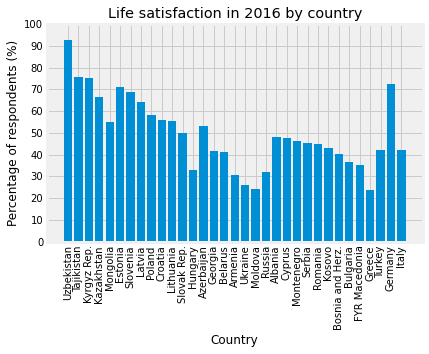

In [18]:
# Plot the replication results
satisfaction_for_plot = replicated_satisfaction.sort_values(by=['Region', 'Life Satisfaction (%)'], ascending=[True, False])
plt.bar(satisfaction_for_plot['Country'], satisfaction_for_plot['Life Satisfaction (%)']);
plt.title('Life satisfaction in 2016 by country')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.ylabel('Percentage of respondents (%)')
plt.xticks(rotation = 90);
plt.yticks(np.arange(0, 101, step = 10));

Figure 2. Replicated mean life satisfaction levels across countries in 2016.

While the transition region as a whole had a lower average life satisfaction level than Western Europe, we can see from Figure 2 that there were marked variations within the transition region, with Central Asian countries such as Uzbekistan, Tajikistan, and the Kyrgyz Republic outperforming all others with life satisfaction levels in excess of 75%. In contrast, some of the countries in Eastern Europe and the Caucasus, such as Ukraine and Armenia, had some of the lowest levels of life satisfaction at around 25-30%.

## b) Political System

Next, we try to replicate the results for political system preferences. Specifically, we find the percentage of each country's population who said that "under some circumstances, an authoritarian government may be preferable to a democratic one". As before, we first collate the original results in a dataframe as gleaned from individual country profiles and charts in the LiT III Report. Note. The level of preference for authoritarianism result for the Czech Republic was not stated in the report.

In [19]:
original_politics = pd.DataFrame()
original_politics[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
original_politics['Authoritarianism (%)'] = [31, 7, 11, 29, 27, 21, 25, 5, 20, 13, 12, np.nan, 12, 16, np.nan, 24, 18, 24, 31, 14, 25, 29, 17, 20, 22, 36, 23, 27, 19, 12, 19, 36, 7]
original_politics

,Country,Transition,Region,Authoritarianism (%)
0,Albania,True,SE Europe,31.0
1,Armenia,True,E Europe & Caucasus,7.0
2,Azerbaijan,True,E Europe & Caucasus,11.0
3,Belarus,True,E Europe & Caucasus,29.0
4,Bosnia and Herz.,True,SE Europe,27.0
5,Bulgaria,True,SE Europe,21.0
6,Croatia,True,C Europe & Baltics,25.0
7,Cyprus,True,SE Europe,5.0
8,Estonia,True,C Europe & Baltics,20.0
9,FYR Macedonia,True,SE Europe,13.0


Table 5. The original mean preference for authoritarianism values for each country.

Now we calculate the mean level of preference for authoritarianism for the transition region.

In [20]:
# Calculate the mean level of preference for authoritarianism in the transition region.
transition_original_politics = np.mean(original_politics[original_politics['Transition'] == True]['Authoritarianism (%)'])
print('Transition region preference for authoritarianism: ' + str(round(transition_original_politics)) + '%')

Transition region preference for authoritarianism: 20%


There are no data in the report about support for authoritarianism in Germany and Italy individually, although the average across the two countries is around 13%, as taken from Chart 3 on p. 75 of the LiT III Report (EBRD, 2016).

We do the political system preferences replication, firstly defining the exclusions and criteria.

In [21]:
# Define exclusions and criteria.

# We want to exclude those rows for which political system preference is NaN or -97 ('don't know').
politics_exclusions = [np.nan, -97]

# We want to use those rows for which the answer to the political system preferences question was 'under some circumstances, an authoritarian government may be preferable to a democratic one' (2).
politics_criteria = [2]

In [22]:
replicated_politics = pd.DataFrame()
replicated_politics[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
replicated_politics['Authoritarianism (%)'] = replicated_politics['Country'].apply(calc_mean_percentage, args=(lits_2016, 'Political System', politics_exclusions, politics_criteria))
replicated_politics

,Country,Transition,Region,Authoritarianism (%)
0,Albania,True,SE Europe,31.111022
1,Armenia,True,E Europe & Caucasus,6.794569
2,Azerbaijan,True,E Europe & Caucasus,11.002291
3,Belarus,True,E Europe & Caucasus,28.773060
4,Bosnia and Herz.,True,SE Europe,26.532885
5,Bulgaria,True,SE Europe,21.457077
6,Croatia,True,C Europe & Baltics,24.908399
7,Cyprus,True,SE Europe,5.144849
8,Estonia,True,C Europe & Baltics,20.350766
9,FYR Macedonia,True,SE Europe,12.809493


Table 6. Attempt at replicating the mean preference for authoritarianism levels for each country.

In [23]:
differences_politics = pd.DataFrame()
differences_politics['Country'] = original_politics['Country']
differences_politics['Authoritarianism Differences (%)'] = (replicated_politics['Authoritarianism (%)'] - original_politics['Authoritarianism (%)']).round()
differences_politics

,Country,Authoritarianism Differences (%)
0,Albania,0.0
1,Armenia,-0.0
2,Azerbaijan,0.0
3,Belarus,-0.0
4,Bosnia and Herz.,-0.0
5,Bulgaria,0.0
6,Croatia,-0.0
7,Cyprus,0.0
8,Estonia,0.0
9,FYR Macedonia,-0.0


Table 7. Differences between the original mean preference for authoritarianism levels and the attempted replication ones.

In [24]:
# Calculate the mean life satisfaction in the transition region.
transition_replicated_politics = np.mean(replicated_politics[replicated_politics['Transition'] == True]['Authoritarianism (%)'])
print('Transition region preference for authoritarianism: ' + str(round(transition_replicated_politics)) + '%')

Transition region preference for authoritarianism: 20%


In [25]:
# Calculate the mean life satisfaction in Western Europe.
w_europe_replicated_politics = np.mean(replicated_politics[replicated_politics['Region'] == 'W Europe']['Authoritarianism (%)'])
print('Western Europe preference for authoritarianism: ' + str(round(w_europe_replicated_politics)) + '%')

Western Europe preference for authoritarianism: 13%


All countries' and regions' results, save for Montenegro's, were replicated for the question of whether authoritarian government is sometimes preferable. In the LiT III Report, it stated that Montenegro's result was "around 17%" (EBRD, 2016, p. 114), so we deem our result of 16.5% to be close enough.

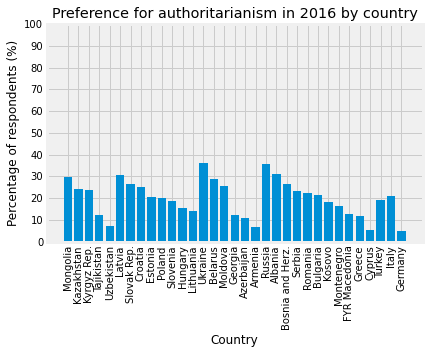

In [26]:
# Plot the replication results
politics_for_plot = replicated_politics.sort_values(by=['Region', 'Authoritarianism (%)'], ascending=[True, False])
plt.bar(politics_for_plot['Country'], politics_for_plot['Authoritarianism (%)']);
plt.title('Preference for authoritarianism in 2016 by country')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.ylabel('Percentage of respondents (%)')
plt.xticks(rotation = 90);
plt.yticks(np.arange(0, 101, step = 10));

Figure 3. Mean level of preference for authoritarianism across countries in 2016.

As in Figure 2, Figure 3 shows substantial variation in levels of support for authoritarianism within the transition region, with the highest support in countries such as Ukraine and Russia (around 35%), and the lowest support in places like Uzbekistan and Armenia (<10%).

Note. The Guardian article (Reuters, 2016) on the LiTS III was inaccurate. The article stated that "just over half the respondents from former Soviet states...thought a return to a more authoritarian system would be a plus in some circumstances". In Figure 3, however, we can see that no country had more than 50% of its respondents answer this way. We suspect that The Guardian claimed this based on an inversion of the EBRD chief economist's statement that "in most of our countries the majority doesn't seem to prefer democracy over authoritarian rule" (Reuters, 2016). However, the newspaper must not have taken into account that there were two other response options, namely, "don't know" and "it does not matter whether a government is democratic or authoritarian". We briefly test this idea below.

In [27]:
# Define former Soviet states.

# Countries that were formerly part of the Soviet Union.
ussr = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyz Rep.', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

In [28]:
def ussr_recoder(country):
    """ Return a boolean for whether a country was in the Soviet Union or not.
    
    Parameters
    ----------
    country : string
        The country for which it is to be determined whether it was in the Soviet Union or not.
    
    Returns
    -------
    in_ussr : boolean
        Whether the country was in the Soviet Union or not.
    """
    
    if country in ussr:
        in_ussr = True
    else:
        in_ussr = False
    
    return in_ussr

In [29]:
# Define exclusions and criteria.

# We want to exclude those rows for which political system preference is NaN.
guardian_exclusions = [np.nan]

# We want to use those rows for which the answer to the political system preferences question was either 'it does not matter whether a government is democratic or authoritarian' (3) or 'don't know' (-97).
guardian_criteria_doesntmatter = [3]

guardian_criteria_dontknow = [-97]

In [30]:
replicated_politics_guardian = pd.DataFrame()
replicated_politics_guardian[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
replicated_politics_guardian['USSR'] = replicated_politics_guardian['Country'].apply(ussr_recoder)
replicated_politics_guardian['Authoritarianism (%)'] = replicated_politics['Authoritarianism (%)']
replicated_politics_guardian["Doesn't matter (%)"] = replicated_politics_guardian['Country'].apply(calc_mean_percentage, args=(lits_2016, 'Political System', guardian_exclusions, guardian_criteria_doesntmatter)).round(1)
replicated_politics_guardian["Don't know (%)"] = replicated_politics_guardian['Country'].apply(calc_mean_percentage, args=(lits_2016, 'Political System', guardian_exclusions, guardian_criteria_dontknow)).round(1)
replicated_politics_guardian.head()

,Country,Transition,Region,USSR,Authoritarianism (%),Doesn't matter (%),Don't know (%)
0,Albania,True,SE Europe,False,31.111022,16.6,7.0
1,Armenia,True,E Europe & Caucasus,True,6.794569,26.5,1.9
2,Azerbaijan,True,E Europe & Caucasus,True,11.002291,35.5,41.9
3,Belarus,True,E Europe & Caucasus,True,28.773060,30.6,13.1
4,Bosnia and Herz.,True,SE Europe,False,26.532885,24.1,11.7


Table 8. Proportions of respondents who answered in favour of authoritarianism, doesn't matter, or don't know across countries, categorised as either former USSR or not.

We test the different combinations: (1) authoritarianism by itself, (2) authoritarianism + doesn't matter, (3) authoritarianism + don't know, and (4) authoritiarianism + doesn't matter + don't know

In [31]:
# Calculate the mean level of preference for authoritarianism or political uncertainty or indifference in former Soviet states.
ussr_replicated_politics_1 = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True]['Authoritarianism (%)'])
ussr_replicated_politics_2 = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True][['Authoritarianism (%)', "Doesn't matter (%)"]].sum(axis=1))
ussr_replicated_politics_3 = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True][['Authoritarianism (%)', "Don't know (%)"]].sum(axis=1))
ussr_replicated_politics_4 = np.mean(replicated_politics_guardian[replicated_politics_guardian['USSR'] == True][['Authoritarianism (%)', "Doesn't matter (%)", "Don't know (%)"]].sum(axis=1))

print('Preference for authoritarianism across former Soviet states: ' + str(round(ussr_replicated_politics_1)) + '%')
print('Preference for authoritarianism or indifference across former Soviet states: ' + str(round(ussr_replicated_politics_2)) + '%')
print('Preference for authoritarianism or uncertainty across former Soviet states: ' + str(round(ussr_replicated_politics_3)) + '%')
print('Preference for authoritarianism or indifference or uncertainty across former Soviet states: ' + str(round(ussr_replicated_politics_4)) + '%')

Preference for authoritarianism across former Soviet states: 21%
Preference for authoritarianism or indifference across former Soviet states: 45%
Preference for authoritarianism or uncertainty across former Soviet states: 32%
Preference for authoritarianism or indifference or uncertainty across former Soviet states: 56%


As can be seen above, only when one considers the combination of preference for authoritarianism, political uncertainty, and political indifference, are over half of respondents from former Soviet states accounted for.

## Analysis

Now that we've done the replications, and despite The Guardian's error, we ask whether there are indeed happiness and political preferences gaps between the Eastern Bloc and Western Europe. Additionally, we were intrigued by Uzbekistan having the highest mean level of life satisfaction of all surveyed countries (93%) and wondered how unusual that was. In other words, we ask how surprising are the differences in mean levels of life satisfaction and preference for authoritarianism between the transition region and Western Europe, as well as Uzbekistan's life satisfaction? Could these values have come about by chance? We test this below, firstly for life satisfaction in general.

In [32]:
# Recall the original life satisfaction values for the transition region and western Europe
print('Transition region life satisfaction: ' + str(round(transition_replicated_satisfaction)) + '%')
print('Western Europe life satisfaction: ' + str(round(w_europe_replicated_satisfaction)) + '%')
real_satisfaction_regions_diff = w_europe_replicated_satisfaction - transition_replicated_satisfaction
print('Difference: ' + str(round(real_satisfaction_regions_diff)) + '%')

Transition region life satisfaction: 49%
Western Europe life satisfaction: 57%
Difference: 8%


In [33]:
# Get a set of fake results
satisfaction_regions_for_permutation = lits_2016.copy()
satisfaction_regions_for_permutation['Life Satisfaction'] = np.random.permutation(satisfaction_regions_for_permutation['Life Satisfaction'])
fake_satisfaction_regions = pd.DataFrame()
fake_satisfaction_regions[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
fake_satisfaction_regions['Life Satisfaction (%)'] = fake_satisfaction_regions['Country'].apply(calc_mean_percentage, args=(satisfaction_regions_for_permutation, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
fake_satisfaction_regions.head()

,Country,Transition,Region,Life Satisfaction (%)
0,Albania,True,SE Europe,51.132639
1,Armenia,True,E Europe & Caucasus,47.736611
2,Azerbaijan,True,E Europe & Caucasus,50.762453
3,Belarus,True,E Europe & Caucasus,51.666458
4,Bosnia and Herz.,True,SE Europe,48.860709


Table 9. Fake mean levels of life satisfaction.

In [34]:
fake_satisfaction_regions_diff = np.mean(fake_satisfaction_regions[fake_satisfaction_regions['Region'] == 'W Europe']['Life Satisfaction (%)']) - np.mean(fake_satisfaction_regions[fake_satisfaction_regions['Transition'] == True]['Life Satisfaction (%)'])
fake_satisfaction_regions_diff

-3.8697434669326043

In [35]:
# Run a permutation test
n_trials = 50
fake_satisfaction_regions_diffs = np.zeros(n_trials)
fake_satisfaction_regions = pd.DataFrame()
fake_satisfaction_regions[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
for i in np.arange(n_trials):
    satisfaction_regions_for_permutation['Life Satisfaction'] = np.random.permutation(satisfaction_regions_for_permutation['Life Satisfaction'])
    fake_satisfaction_regions['Life Satisfaction (%)'] = fake_satisfaction_regions['Country'].apply(calc_mean_percentage, args=(satisfaction_regions_for_permutation, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
    fake_satisfaction_regions_diffs[i] = np.mean(fake_satisfaction_regions[fake_satisfaction_regions['Region'] == 'W Europe']['Life Satisfaction (%)']) - np.mean(fake_satisfaction_regions[fake_satisfaction_regions['Transition'] == True]['Life Satisfaction (%)'])
fake_satisfaction_regions_diffs[:5]

array([ 2.68345824, -1.11211381,  1.41833158, -0.45126118,  2.71741606])

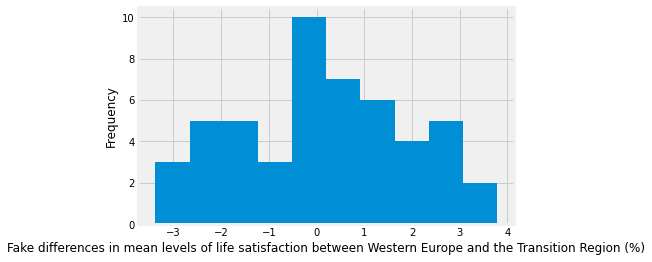

In [36]:
# Plot a histogram
plt.hist(fake_satisfaction_regions_diffs);
plt.xlabel('Fake differences in mean levels of life satisfaction between Western Europe and the Transition Region (%)');
plt.ylabel('Frequency');

Figure 4. Histogram of fake differences in mean levels of life satisfaction between Western Europe and the Transition Region.

In [37]:
# Get the proportion of null world differences that were greater than or equal to the observed difference.
p_gte_satisfaction_regions = np.count_nonzero(fake_satisfaction_regions_diffs >= real_satisfaction_regions_diff) / len(fake_satisfaction_regions_diffs)
p_gte_satisfaction_regions

0.0

Turning to the individual case of Uzbekistan, we test if we can equal or surpass 93% from random shuffling of the life satisfaction responses.

In [38]:
# Life satisfaction (%) in Uzbekistan
uzbekistan_satisfaction = replicated_satisfaction[replicated_satisfaction['Country'] == 'Uzbekistan']['Life Satisfaction (%)'].values[0]
uzbekistan_satisfaction

92.69197599531384

In [39]:
# Run a permutation test
n_trials = 50
fake_uzbekistan_satisfactions = np.zeros(n_trials)
fake_satisfaction_regions = pd.DataFrame()
fake_satisfaction_regions[['Country', 'Transition', 'Region']] = original_satisfaction[['Country', 'Transition', 'Region']]
for i in np.arange(n_trials):
    satisfaction_regions_for_permutation['Life Satisfaction'] = np.random.permutation(satisfaction_regions_for_permutation['Life Satisfaction'])
    fake_satisfaction_regions['Life Satisfaction (%)'] = fake_satisfaction_regions['Country'].apply(calc_mean_percentage, args=(satisfaction_regions_for_permutation, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
    fake_uzbekistan_satisfactions[i] = fake_satisfaction_regions[fake_satisfaction_regions['Country'] == 'Uzbekistan']['Life Satisfaction (%)']
fake_uzbekistan_satisfactions[:5]

array([50.69539721, 48.29087059, 48.64542859, 46.2988532 , 49.54074913])

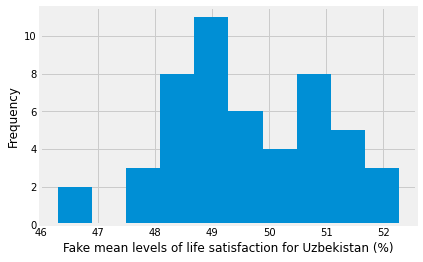

In [40]:
# Plot a histogram
plt.hist(fake_uzbekistan_satisfactions);
plt.xlabel('Fake mean levels of life satisfaction for Uzbekistan (%)');
plt.ylabel('Frequency');

Figure 5. Histogram of fake mean levels of life satisfaction for Uzbekistan

In [41]:
# Get the proportion of null world differences that were greater than or equal to the observed difference.
p_gte_uzbekistan_satisfaction = np.count_nonzero(fake_uzbekistan_satisfactions >= uzbekistan_satisfaction) / len(fake_uzbekistan_satisfactions)
p_gte_uzbekistan_satisfaction

0.0

And now for the preference for authoritarianism results.

In [42]:
# Recall the original authoritarianism values for the transition region and western Europe
print('Transition region authoritarianism: ' + str(round(transition_replicated_politics)) + '%')
print('Western Europe authoritarianism: ' + str(round(w_europe_replicated_politics)) + '%')
real_politics_diff = transition_replicated_politics - w_europe_replicated_politics
print('Difference: ' + str(round(real_politics_diff)) + '%')

Transition region authoritarianism: 20%
Western Europe authoritarianism: 13%
Difference: 7%


In [43]:
# Get a set of fake results
politics_for_permutation = lits_2016.copy()
politics_for_permutation['Political System'] = np.random.permutation(politics_for_permutation['Political System'])
fake_politics = pd.DataFrame()
fake_politics[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
fake_politics['Authoritarianism (%)'] = fake_politics['Country'].apply(calc_mean_percentage, args=(politics_for_permutation, 'Political System', politics_exclusions, politics_criteria))
fake_politics.head()

,Country,Transition,Region,Authoritarianism (%)
0,Albania,True,SE Europe,21.310638
1,Armenia,True,E Europe & Caucasus,21.759028
2,Azerbaijan,True,E Europe & Caucasus,18.783069
3,Belarus,True,E Europe & Caucasus,20.374715
4,Bosnia and Herz.,True,SE Europe,21.868973


Table 10. Fake mean levels of preference for authoritarianism.

In [44]:
fake_politics_diff = np.mean(fake_politics[fake_politics['Transition'] == True]['Authoritarianism (%)']) - np.mean(fake_politics[fake_politics['Region'] == 'W Europe']['Authoritarianism (%)'])
fake_politics_diff

-3.7008537567443938

In [45]:
# Run a permutation test
n_trials = 50
fake_politics_diffs = np.zeros(n_trials)
fake_politics = pd.DataFrame()
fake_politics[['Country', 'Transition', 'Region']] = original_politics[['Country', 'Transition', 'Region']]
for i in np.arange(n_trials):
    politics_for_permutation['Political System'] = np.random.permutation(politics_for_permutation['Political System'])
    fake_politics['Authoritarianism (%)'] = fake_politics['Country'].apply(calc_mean_percentage, args=(politics_for_permutation, 'Political System', politics_exclusions, politics_criteria))
    fake_politics_diffs[i] = np.mean(fake_politics[fake_politics['Transition'] == True]['Authoritarianism (%)']) - np.mean(fake_politics[fake_politics['Region'] == 'W Europe']['Authoritarianism (%)'])
fake_politics_diffs[:5]

array([-1.19092864, -1.05609652, -0.74795557, -1.01154715,  1.36198934])

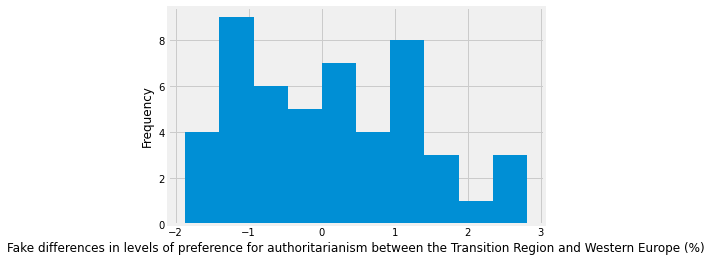

In [46]:
# Plot a histogram
plt.hist(fake_politics_diffs);
plt.xlabel('Fake differences in levels of preference for authoritarianism between the Transition Region and Western Europe (%)');
plt.ylabel('Frequency');

Figure 6. Histogram of fake differences in levels of preference for authoritarianism between the Transition Region and Western Europe.

In [47]:
# Get the proportion of null world differences that were greater than or equal to the observed difference.
p_gte_politics = np.count_nonzero(fake_politics_diffs >= real_politics_diff) / len(fake_politics_diffs)
p_gte_politics

0.0

For both life satisfaction and preference for authoritarianism, it is highly unlikely that the differences between the main regions came about by chance, since they did not occur at all in the null worlds. In other words, there indeed seem to be significant happiness (57% vs. 49% for Western Europe and the European Bloc, respectively) and preference for authoritarianism gaps (13% vs. 20%), and Uzbekistan has an unusually high mean life satisfaction level of 93%.

We next test whether there is a correlation between life satisfaction and preference for authoritarianism on the country level.

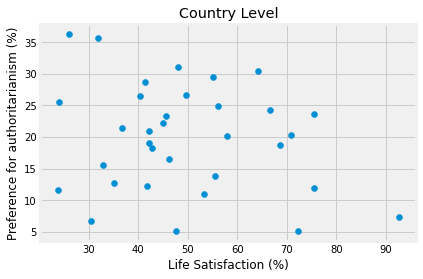

In [48]:
plt.scatter(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)']);
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Preference for authoritarianism (%)');
plt.title('Country Level');

Figure 7. Scatterplot of life satisfaction and preference for authoritarianism on the country level.

In [49]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [50]:
def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

In [51]:
correlation(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)'])

-0.22418977828188366

There is a weak negative correlation between life satisfaction and preference for authoritarianism. That is, broadly speaking, as life satisfaction increases, preference for authoritarianism tends to decrease. While correlation does not necessarily mean causation, one possible reason for this is that democracies confer freedoms and benefits not found under authoritarian regimes that translate to better standards of living and thus happier citizens.

In [52]:
from scipy.stats import linregress
result_ls_a = linregress(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)'])
result_ls_a

LinregressResult(slope=-0.11391920219883346, intercept=25.591112583929043, rvalue=-0.22418977828188366, pvalue=0.20975016394295673, stderr=0.0889410809974526, intercept_stderr=4.647417747117448)

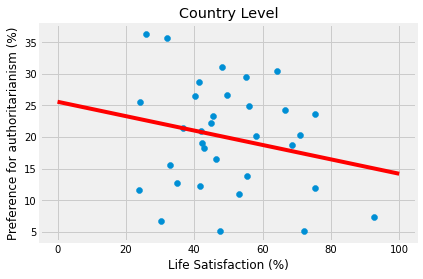

In [53]:
plt.scatter(replicated_satisfaction['Life Satisfaction (%)'], replicated_politics['Authoritarianism (%)']);
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Preference for authoritarianism (%)');
plt.title('Country Level');
x_ls_a = np.linspace(0,100,101)
y_ls_a = result_ls_a.slope * x_ls_a + result_ls_a.intercept
plt.plot(x_ls_a, y_ls_a, '-r');

Figure 8. Correlation between life satisfaction and preference for authoritarianism on the country level.

However, country averages mask regional variations. Perhaps there might be a different correlation if we look at primary sampling units (PSUs), which are geographical areas within each country from which an average of 20 households were sampled.

In [54]:
# Define a function that will calculate the survey-weighted level of a certain measure for each PSU.
def calc_percentage_psu(country_psu, df, measure, exclusions, criteria):
    """ Return the mean percentage of respondents in a given PSU who fulfilled certain criteria on a given measure.
    
    Paramaters
    ----------
    country_psu : array
        The first element is the country of the PSU and the second element is the PSU for which we are finding the percentage of respondents who fulfilled certain criteria.
    df : dataframe
        The dataframe from which we draw our results.
    measure: string
        The measure of interest.
    exclusions: array
        Values of the measure of interest that are excluded from further analysis.
    criteria: array
        Values of the measure of interest that are included for calculating the percentage.
    
    Returns
    -------
    mean_percentage : number
        The mean percentage of respondents in a given PSU who fulfilled certain criteria on a given measure.
    
    """
    
    country, psu = country_psu
    
    # Take the segment of the dataframe corresponding to the given country and PSU.
    df_overall = df.copy()
    df_overall = df_overall[df_overall['Country'] == country]
    df_overall = df_overall[df_overall['PSU'] == psu]
    
    # Clean the dataframe by removing rows with the excluded values in the measure column.
    df_overall = exclude_values(df_overall, measure, exclusions)
    
    # Create a new dataframe that contains only those rows that passed the criteria on the measure column.
    df_select = include_values(df_overall, measure, criteria)
        
    mean_percentage = np.sum(df_select['Weight 1']) / np.sum(df_overall['Weight 1']) * 100
    
    return mean_percentage

In [55]:
by_country_psu = lits_2016.groupby(['Country', 'PSU']).size().to_frame(name = 'Count').reset_index()
by_country_psu['Life Satisfaction (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Life Satisfaction', satisfaction_exclusions, satisfaction_criteria))
by_country_psu['Authoritarianism (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Political System', politics_exclusions, politics_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%)
0,Albania,1,20,22.923973,59.506502
1,Albania,2,20,33.530334,63.421760
2,Albania,3,20,83.029105,95.903399
3,Albania,4,20,81.967024,95.634206
4,Albania,5,20,97.047925,95.375235


Table 11. The mean levels of life satisfaction and preference for authoritarianism across PSUs.

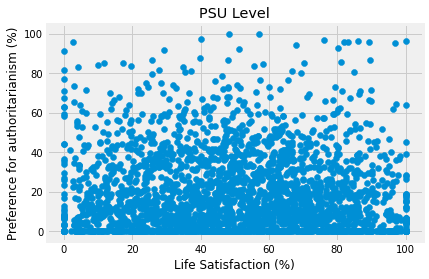

In [56]:
plt.scatter(by_country_psu['Life Satisfaction (%)'], by_country_psu['Authoritarianism (%)']);
#plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'], c = 'red')
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Preference for authoritarianism (%)');
plt.title('PSU Level');

Figure 9. Scatterplot of life satisfaction and preference for authoritarianism on the PSU level.

In [57]:
correlation(by_country_psu['Life Satisfaction (%)'], by_country_psu['Authoritarianism (%)'])

-0.04519003439155546

Once we examined the data at a finer scale of PSUs, there was practically no correlation between life satisfaction and preference for authoritarianism. That is, both happy and unhappy PSUs showed high and low preference for authoritarianism. However, given that there are normally a maximum of 20 data points in each PSU, these results are more prone to skewing.

Another way to approach the relationship between life satisfaction and political leaning is to calculate the mean life satisfaction of all those who responded a certain way for the question of democracy versus authoritarianism.

In [58]:
for_satisfaction_by_politics = exclude_values(lits_2016, 'Life Satisfaction', satisfaction_exclusions)
mean_satisfaction_by_politics = [np.mean(for_satisfaction_by_politics[for_satisfaction_by_politics['Political System'] == politics]['Life Satisfaction']) for politics in [1, 2, 3, -97]]

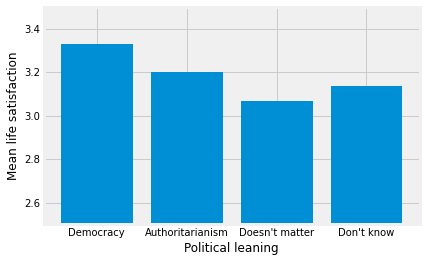

In [59]:
plt.bar(['Democracy', 'Authoritarianism', "Doesn't matter", "Don't know"], mean_satisfaction_by_politics)
plt.ylim([2.5, 3.5])
plt.xlabel('Political leaning');
plt.ylabel('Mean life satisfaction');

Figure 10. Bar chart showing mean life satisfaction for each of the political leanings response options. Note. 3 for life satisfaction means "neither disagree or agree" with the statement that "all things considered, I am satisfied with my life now". 4 means "agree" with this statement.

It appears that the most satisfied are those who were definitely in favour of democracy, followed by those who considered authoritarianism sometimes necessary. Interestingly, those who were indifferent or perhaps uninformed reported the lowest average life satisfaction. We test whether the difference in the mean life satisfaction results between "democracy" and "authoritarianism" could have come about by chance.

In [60]:
real_diff_democracy_authoritarianism = mean_satisfaction_by_politics[0] - mean_satisfaction_by_politics[1]
real_diff_democracy_authoritarianism

0.1309588583091421

In [61]:
# Get a set of fake results
satisfaction_for_permutation = lits_2016.copy()
n_trials = 50
fake_diffs_democracy_authoritarianism = np.zeros(n_trials)
for i in np.arange(n_trials):
    satisfaction_for_permutation['Life Satisfaction'] = np.random.permutation(satisfaction_for_permutation['Life Satisfaction'])
    fake_for_satisfaction_by_politics = exclude_values(satisfaction_for_permutation, 'Life Satisfaction', satisfaction_exclusions)
    fake_mean_satisfaction_by_politics = [np.mean(fake_for_satisfaction_by_politics[fake_for_satisfaction_by_politics['Political System'] == politics]['Life Satisfaction']) for politics in [1, 2, 3, -97]]
    fake_diffs_democracy_authoritarianism[i] = fake_mean_satisfaction_by_politics[0] - fake_mean_satisfaction_by_politics[1]
fake_diffs_democracy_authoritarianism[:5]

array([-0.02249994, -0.02412742,  0.01595331, -0.00537882,  0.00442874])

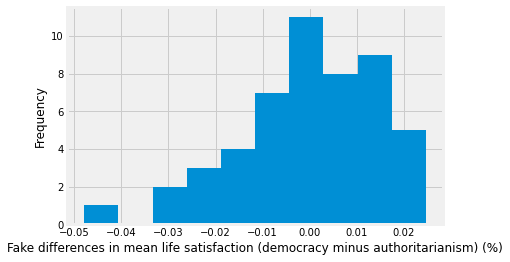

In [62]:
# Plot a histogram
plt.hist(fake_diffs_democracy_authoritarianism);
plt.xlabel('Fake differences in mean life satisfaction (democracy minus authoritarianism) (%)');
plt.ylabel('Frequency');

Figure 11. Fake differences in mean life satisfaction (democracy minus authoritarianism)

In [63]:
# Get the proportion of null world differences that were greater than or equal to the observed difference.
p_gte_diff_satisfaction = np.count_nonzero(fake_diffs_democracy_authoritarianism >= real_diff_democracy_authoritarianism) / len(fake_diffs_democracy_authoritarianism)
p_gte_diff_satisfaction

0.0

The difference in mean life satisfaction for respondents for democracy and those for authoritarianism was highly unlikely to have come about by chance. That life satisfaction is lower for those voicing support for authoritarianism is in keeping with the correlation on the country level (Figure 8), providing some evidence of a link between the two variables.

We proceed to examine other factors that might affect life satisfaction levels at both the country and PSU levels.

Firstly, previous literature indicates that people are happier outside of cities, possibly due to lower population densities and closer community ties (Helliwell et al., 2019). We test if this result was replicated in the present dataset by correlating the percentage of the population who live in urban areas with life satisfaction.

-0.3478155051287354

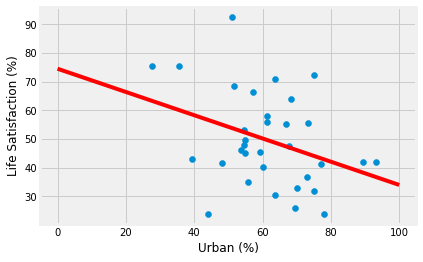

In [64]:
for_by_country = lits_2016.copy()
by_country = pd.DataFrame()
by_country['Country'] = all_countries
by_country['Life Satisfaction (%)'] = replicated_satisfaction['Life Satisfaction (%)']
urban_exclusions = []
urban_criteria = [1]
by_country['Urban (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Urban', urban_exclusions, urban_criteria))
result_u_ls = linregress(by_country['Urban (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Urban (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Urban (%)')
plt.ylabel('Life Satisfaction (%)')
x_u_ls = np.linspace(0,100,101)
y_u_ls = result_u_ls.slope * x_u_ls + result_u_ls.intercept
plt.plot(x_u_ls, y_u_ls, '-r');
correlation(by_country['Urban (%)'], by_country['Life Satisfaction (%)'])

Figure 12. Correlation between the percentage of the population in urban areas and life satisfaction on the country level.

There is a medium negative correlation with the percentage of the population in urban areas and life satisfaction, which chimes with the previous literature.

While religiousness can have multiple meanings, several of its indices, such as prayer and visiting places of worship, correlate with well-being (Steger & Frazier, 2005). We correlated religious affiliation with life satisfaction.

-0.2525361875400694

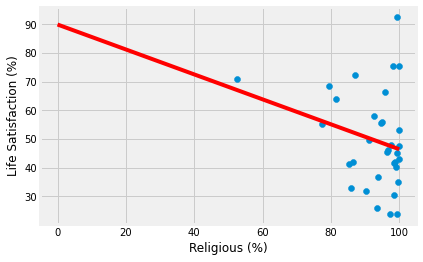

In [65]:
religious_exclusions = [-99, '']
religious_criteria = [2, 3, 4, 5, 6, 7, 8]
by_country['Religious (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Religious', religious_exclusions, religious_criteria))
result_r_ls = linregress(by_country['Religious (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Religious (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Religious (%)')
plt.ylabel('Life Satisfaction (%)')
x_r_ls = np.linspace(0,100,101)
y_r_ls = result_r_ls.slope * x_r_ls + result_r_ls.intercept
plt.plot(x_r_ls, y_r_ls, '-r');
correlation(by_country['Religious (%)'], by_country['Life Satisfaction (%)'])

Figure 13. Correlation between the percentage of the population who consider themselves to be religious and life satisfaction on the country level.

Firstly, it appears the vast majority of respondents are religious, which is the pattern globally (Hackett et al., 2012). Secondly, there is a small negative correlation between religiousness and life satisfaction, although visual inspection of the scatterplot suggests that the relationship is non-linear such that there are some countries with high religiousness that are happy and others that are not.

We proceed to test a few more variables on the country level, such as the feeling of having done better than one's parents, general trust, trust in neighbourhood, and perceived wealth level.

0.749074850011865

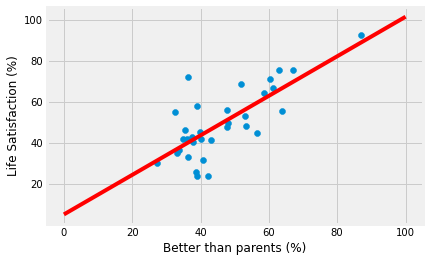

In [66]:
parents_exclusions = [np.nan, -97, -98]
parents_criteria = [4, 5]
by_country['Better than parents (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Parents', parents_exclusions, parents_criteria))
result_bp_ls = linregress(by_country['Better than parents (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Better than parents (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Better than parents (%)')
plt.ylabel('Life Satisfaction (%)')
x_bp_ls = np.linspace(0,100,101)
y_bp_ls = result_bp_ls.slope * x_bp_ls + result_bp_ls.intercept
plt.plot(x_bp_ls, y_bp_ls, '-r');
correlation(by_country['Better than parents (%)'], by_country['Life Satisfaction (%)'])

Figure 14. Correlation between the percentage of the population who consider themselves to have done better than their parents and life satisfaction on the country level.

Bettering one's parents has a strong (around 0.7) correlation with life satisfaction, although it could be that one concludes they have done better than one's parents on the basis of feeling more satisfied with life and not the other way around.

0.4550616332463883

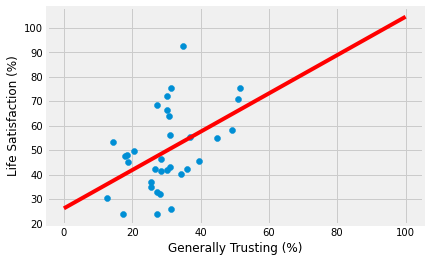

In [67]:
trust_general_exclusions = [-91, '']
trust_general_criteria = [4, 5]
by_country['Generally Trusting (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Trust General', trust_general_exclusions, trust_general_criteria))
result_tg_ls = linregress(by_country['Generally Trusting (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Generally Trusting (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Generally Trusting (%)')
plt.ylabel('Life Satisfaction (%)')
x_tg_ls = np.linspace(0,100,101)
y_tg_ls = result_tg_ls.slope * x_tg_ls + result_tg_ls.intercept
plt.plot(x_tg_ls, y_tg_ls, '-r');
correlation(by_country['Generally Trusting (%)'], by_country['Life Satisfaction (%)'])

Figure 15. Correlation between the percentage of the population who are generally trusting and life satisfaction on the country level.

0.5434193083693709

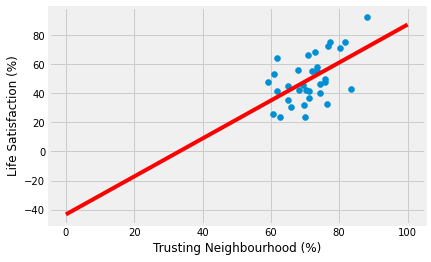

In [68]:
trust_neighbourhood_exclusions = [-97, -98, '']
trust_neighbourhood_criteria = [4, 5]
by_country['Trusting Neighbourhood (%)'] = by_country['Country'].apply(calc_mean_percentage, args=(for_by_country, 'Trust Neighbourhood', trust_neighbourhood_exclusions, trust_neighbourhood_criteria))
result_tn_ls = linregress(by_country['Trusting Neighbourhood (%)'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Trusting Neighbourhood (%)'], by_country['Life Satisfaction (%)']);
plt.xlabel('Trusting Neighbourhood (%)')
plt.ylabel('Life Satisfaction (%)')
x_tn_ls = np.linspace(0,100,101)
y_tn_ls = result_tn_ls.slope * x_tn_ls + result_tn_ls.intercept
plt.plot(x_tn_ls, y_tn_ls, '-r');
correlation(by_country['Trusting Neighbourhood (%)'], by_country['Life Satisfaction (%)'])

Figure 16. Correlation between the percentage of the population who trust their neighbourhood and life satisfaction on the country level.

More people trust their neighbourhoods than people in general. The former kind of trust, which perhaps taps into strength of community ties, correlates more strongly with life satisfaction. Indeed, wider social support correlates with life satisfaction, especially in smaller communities (Prezza & Constantini, 1998).

In [69]:
# Define a function that will calculate the mean value of a certain measure for a given country.
def calc_mean(country, df, measure, exclusions):
    """ Return the mean value of a given measure in a dataframe cleaned of values in exclusions.
    
    Paramaters
    ----------
    country : string
        The country for which we are finding the mean of a certain measure.
    df : dataframe
        The dataframe from which we draw our results.
    measure: string
        The measure of interest.
    exclusions: array
        Values of the measure of interest that are excluded from further analysis.
    
    Returns
    -------
    mean : number
        The mean value of a given measure.
    
    """
    
    # Take the segment of the dataframe corresponding to the given country.
    df_overall = df.copy()
    df_overall = df_overall[df_overall['Country'] == country]
    
    # Clean the dataframe by removing rows with the excluded values in the measure column.
    df_overall = exclude_values(df_overall, measure, exclusions)

    mean = np.sum(df_overall['Weight Sample'] * df_overall[measure]) / np.sum(df_overall['Weight Sample'])
    
    return mean

0.13051883158969393

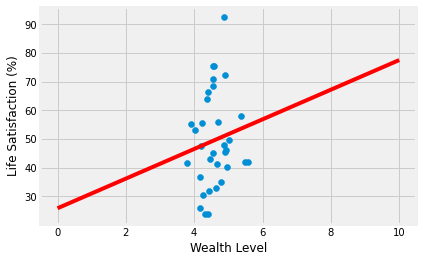

In [70]:
wealth_exclusions = [np.nan, -97, -99]
by_country['Wealth Level'] = by_country['Country'].apply(calc_mean, args=(for_by_country, 'Wealth Level', wealth_exclusions))
result_wl_ls = linregress(by_country['Wealth Level'], by_country['Life Satisfaction (%)'])
plt.scatter(by_country['Wealth Level'], by_country['Life Satisfaction (%)']);
plt.xlabel('Wealth Level')
plt.ylabel('Life Satisfaction (%)')
x_wl_ls = np.linspace(0,10,11)
y_wl_ls = result_wl_ls.slope * x_wl_ls + result_wl_ls.intercept
plt.plot(x_wl_ls, y_wl_ls, '-r');
correlation(by_country['Wealth Level'], by_country['Life Satisfaction (%)'])

Figure 17. Correlation between perceived wealth level and life satisfaction on the country level.

There does not appear to be a strong linear relationship between perceived wealth level and life satisfaction.

We now turn to examine the relationships between life satisfaction (and sometimes preference for authoritarianism) and the above variables on the PSU level. We also extend to consider other second variables, such as mean age, socialising, monthly income, perceived wealth, education, employment, and health. Note. Red dots in the PSU scatterplots represent Uzbek PSUs whenever they appear.

In [71]:
# Define a function that will calculate the mean value of a certain measure in each PSU.
def calc_mean_psu(country_psu, df, measure, exclusions):
    """ Return the mean value of a given measure in a dataframe cleaned of values in exclusions.
    
    Paramaters
    ----------
    country_psu : array
        The first element is the country of the PSU and the second element is the PSU for which we are finding the mean of a certain measure.
    df : dataframe
        The dataframe from which we draw our results.
    measure: string
        The measure of interest.
    exclusions: array
        Values of the measure of interest that are excluded from further analysis.
    
    Returns
    -------
    mean : number
        The mean value of a given measure.
    
    """
    
    country, psu = country_psu
    
    # Take the segment of the dataframe corresponding to the given country and PSU.
    df_overall = df.copy()
    df_overall = df_overall[df_overall['Country'] == country]
    df_overall = df_overall[df_overall['PSU'] == psu]
    
    # Clean the dataframe by removing rows with the excluded values in the measure column.
    df_overall = exclude_values(df_overall, measure, exclusions)

    mean = np.sum(df_overall['Weight Sample'] * df_overall[measure]) / np.sum(df_overall['Weight Sample'])
    
    return mean

In [72]:
# Exclusions

age_exclusions = []

In [73]:
by_country_psu['Mean age'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Age', age_exclusions))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age
0,Albania,1,20,22.923973,59.506502,37.532303
1,Albania,2,20,33.530334,63.421760,43.484388
2,Albania,3,20,83.029105,95.903399,41.648407
3,Albania,4,20,81.967024,95.634206,48.774807
4,Albania,5,20,97.047925,95.375235,41.106053


Table 11. Life satisfaction, preference for authoritarianism, and mean age in PSUs.

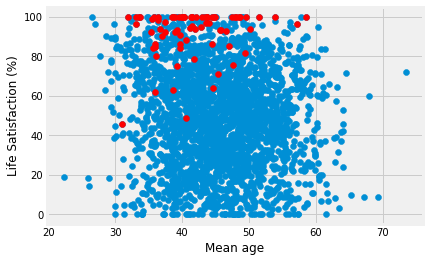

In [74]:
plt.scatter(by_country_psu['Mean age'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Mean age'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Mean age');
plt.ylabel('Life Satisfaction (%)');

Figure 18. Scatterplot of mean age and life satisfaction on the PSU level.

In [75]:
correlation(by_country_psu['Mean age'], by_country_psu['Life Satisfaction (%)'])

-0.09672912155770746

In [76]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Mean age'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.18007597850315793

There is no real correlation between mean age and mean life satisfaction in PSUs, with a weak positive correlation for Uzbekistan.

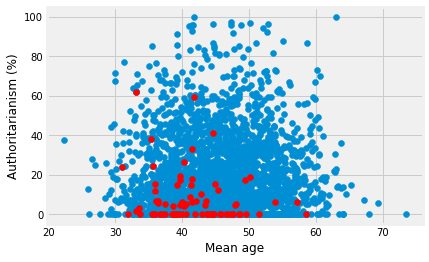

In [77]:
plt.scatter(by_country_psu['Mean age'], by_country_psu['Authoritarianism (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Mean age'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'], c = 'red')
plt.xlabel('Mean age');
plt.ylabel('Authoritarianism (%)');

Figure 19. Scatterplot of mean age and preference for authoritarianism on the PSU level.

In [78]:
correlation(by_country_psu['Mean age'], by_country_psu['Authoritarianism (%)'])

0.005688883312573651

In [79]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Mean age'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'])

-0.16870387837034617

Similarly, there is no correlation between mean age and preference for authoritarianism when looking at individual PSUs, and a weak negative correlation for Uzbekistan.

What about the relationship between socialising with people outside the household (e.g., extended family and friends) and life satisfaction? We take high socialising to mean those who meet with friends and relatives at least once or twice a week.

In [80]:
# Exclusions

social_exclusions = [-97, -99]

# Criteria

social_criteria = [1, 2]

In [81]:
by_country_psu['Socialising (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Socialising', social_exclusions, social_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000


Table 12. Levels of high socialising in PSUs.

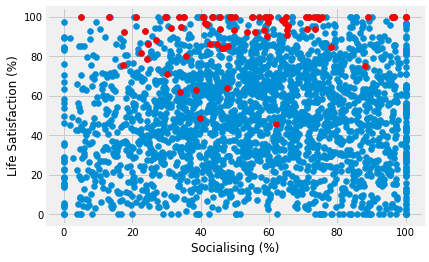

In [82]:
plt.scatter(by_country_psu['Socialising (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Socialising (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Socialising (%)');
plt.ylabel('Life Satisfaction (%)');

Figure 20. Scatterplot of high socialising and life satisfaction on the PSU level.

In [83]:
correlation(by_country_psu['Socialising (%)'], by_country_psu['Life Satisfaction (%)'])

0.04638498909585818

In [84]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Socialising (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.22484686051027453

Again, mean levels of high socialising are a poor predictor of mean life satisfaction in PSUs, although they are slightly better predictors for Uzbek PSUs.

We next turn to the question of income. First, we need to convert the monthly income from the local currency (LCU) to USD ($) to be able to compare. We can do this using the Purchasing Power Parity (PPP) from 2016.

In [85]:
# Exclusions

income_exclusions = [np.nan, -99, 2147483647] # there are 2 instances of this very high number that are extreme outliers, so will be excluded

In [86]:
by_country_psu['Monthly Income (LCU)'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Monthly Income', income_exclusions))
by_country_psu

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,4.264576e+04
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,4.410742e+04
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1.616997e+03
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,1.353026e+02
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,7.012675e+01
...,...,...,...,...,...,...,...,...
2541,Uzbekistan,71,20,75.808826,0.000000,47.567680,17.368721,2.095495e+06
2542,Uzbekistan,72,20,64.119574,41.365313,44.666007,47.602604,2.019473e+06
2543,Uzbekistan,73,20,71.217250,12.309709,45.412203,30.114617,1.341288e+06
2544,Uzbekistan,74,20,92.220943,0.000000,38.911502,56.019469,1.690936e+06


Table 13. Monthly income (LCU) in PSUs.

In 2016, Belarus introduced a new rouble such that 1 new rouble was equivalent to 10,000 old roubles. 
The incomes for Belarussian households in LiTS III were reported using the old currency, whereas the PPP loaded below assumes the new currency.
Therefore, to use with the PPP, we convert the Belarussian incomes from the old currency to the new currency.
Source: https://en.wikipedia.org/wiki/Belarusian_ruble#Third_ruble,_2016%E2%80%93present.

In [87]:
for i in np.arange(len(by_country_psu)):
    if by_country_psu.loc[i, 'Country'] == 'Belarus':
        by_country_psu.loc[i, 'Monthly Income (LCU)'] = by_country_psu.loc[i, 'Monthly Income (LCU)'] / 10000

We got the PPP data from https://databank.worldbank.org/reports.aspx?source=2&series=PA.NUS.PPP#

In [88]:
# Read the table
ppp = pd.read_csv('./data/PPP 2016.csv')
# Select only the columns we're interested in
good_cols = ['Country Name', '2016 [YR2016]']
ppp = ppp.loc[:, good_cols]
# Give the columns new names
good_names = ['Country', 'PPP']
ppp.columns = good_names
ppp.head()

,Country,PPP
0,Afghanistan,17.4458279431472
1,Albania,42.3858791506381
2,Algeria,37.1558265686035
3,American Samoa,..
4,Andorra,..


Table 14. Purchasing power parity for countries in 2016.

In [89]:
# Get the PPP for the countries of interest
ppp_for_lits = pd.DataFrame()
for i in np.arange(len(ppp['Country'])):
    if ppp.iloc[i,0] in all_countries:
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
    elif ppp.iloc[i,0] == 'North Macedonia':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'FYR Macedonia'
    elif ppp.iloc[i,0] == 'Kyrgyz Republic':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Kyrgyz Rep.'
    elif ppp.iloc[i,0] == 'Russian Federation':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Russia'
    elif ppp.iloc[i,0] == 'Bosnia and Herzegovina':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Bosnia and Herz.'
    elif ppp.iloc[i,0] == 'Slovak Republic':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Slovak Rep.'
    elif ppp.iloc[i,0] == 'Czech Republic':
        ppp_for_lits = ppp_for_lits.append(ppp.iloc[i])
        ppp_for_lits.iloc[-1,0] = 'Czech Rep.'
ppp_for_lits = ppp_for_lits.sort_values('Country', ascending=True)
ppp_for_lits = ppp_for_lits.set_index('Country')
ppp_for_lits['PPP'] = pd.to_numeric(ppp_for_lits['PPP'])
ppp_for_lits.head()

,PPP
Country,
Albania,42.385879
Armenia,161.228882
Azerbaijan,0.430901
Belarus,0.563757
Bosnia and Herz.,0.675568


Table 15. PPP for countries in LiTS III.

In [90]:
# Merge Tables 13 and 15
by_country_psu = by_country_psu.merge(ppp_for_lits, on='Country')
by_country_psu

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,4.264576e+04,42.385879
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,4.410742e+04,42.385879
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1.616997e+03,42.385879
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,1.353026e+02,42.385879
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,7.012675e+01,42.385879
...,...,...,...,...,...,...,...,...,...
2541,Uzbekistan,71,20,75.808826,0.000000,47.567680,17.368721,2.095495e+06,1179.956705
2542,Uzbekistan,72,20,64.119574,41.365313,44.666007,47.602604,2.019473e+06,1179.956705
2543,Uzbekistan,73,20,71.217250,12.309709,45.412203,30.114617,1.341288e+06,1179.956705
2544,Uzbekistan,74,20,92.220943,0.000000,38.911502,56.019469,1.690936e+06,1179.956705


Table 16. PPP in PSUs.

We convert the monthly incomes from the local currency to USD ($).

In [91]:
by_country_psu['Monthly Income ($)'] = (by_country_psu['Monthly Income (LCU)'] / by_country_psu['PPP'])
by_country_psu

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,4.264576e+04,42.385879,1006.131267
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,4.410742e+04,42.385879,1040.615879
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1.616997e+03,42.385879,38.149432
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,1.353026e+02,42.385879,3.192161
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,7.012675e+01,42.385879,1.654484
...,...,...,...,...,...,...,...,...,...,...
2541,Uzbekistan,71,20,75.808826,0.000000,47.567680,17.368721,2.095495e+06,1179.956705,1775.908527
2542,Uzbekistan,72,20,64.119574,41.365313,44.666007,47.602604,2.019473e+06,1179.956705,1711.480270
2543,Uzbekistan,73,20,71.217250,12.309709,45.412203,30.114617,1.341288e+06,1179.956705,1136.726040
2544,Uzbekistan,74,20,92.220943,0.000000,38.911502,56.019469,1.690936e+06,1179.956705,1433.049410


Table 17. Monthly income ($) in PSUs.

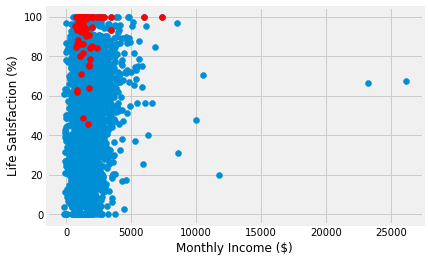

In [92]:
plt.scatter(by_country_psu['Monthly Income ($)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Monthly Income ($)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Monthly Income ($)');
plt.ylabel('Life Satisfaction (%)');

Figure 21. Scatterplot of monthly income ($) and life satisfaction on the PSU level.

In [93]:
correlation(by_country_psu['Monthly Income ($)'], by_country_psu['Life Satisfaction (%)'])

0.17428135027584665

In [94]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Monthly Income ($)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.12788614243005753

There is a weak positive correlation between income levels and life satisfaction. Perhaps what matters is not absolute wealth, but (changes in) perceived wealth, which is what is explored next. Specifically, respondents were asked to imagine a 10-step ladder where the bottom rung represents their country's poorest 10%. They were then asked to judge where they would place themselves on that ladder now (2016), four years ago (2012), and four years into the future (2020). 

In [95]:
# Exclusions

wealth_exclusions = [np.nan, -97, -99]

In [96]:
by_country_psu['Wealth Level'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Wealth Level', wealth_exclusions))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120


Table 18. Mean wealth levels in PSUs.

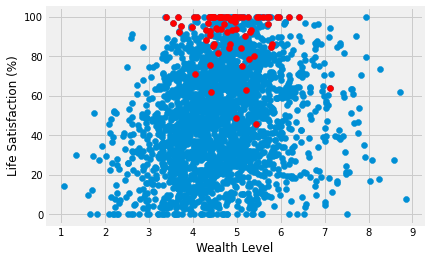

In [97]:
plt.scatter(by_country_psu['Wealth Level'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Wealth Level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Wealth Level');
plt.ylabel('Life Satisfaction (%)');

Figure 22. Scatterplot of perceived current wealth level and life satisfaction on the PSU level.

In [98]:
correlation(by_country_psu['Wealth Level'], by_country_psu['Life Satisfaction (%)'])

0.213634652202975

In [99]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Wealth Level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

-0.14387615611482257

In [100]:
by_country_psu['Past Wealth Level'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Past Wealth Level', wealth_exclusions))
by_country_psu['Past Wealth Change'] = by_country_psu['Wealth Level'] - by_country_psu['Past Wealth Level']
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894


Table 19. Past wealth level and past wealth change in PSUs.

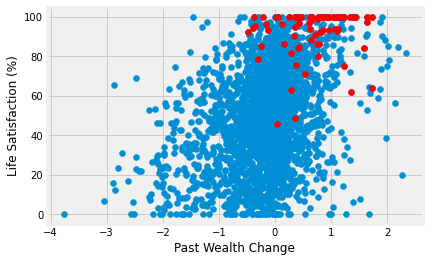

In [101]:
plt.scatter(by_country_psu['Past Wealth Change'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Past Wealth Change'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Past Wealth Change');
plt.ylabel('Life Satisfaction (%)');

Figure 23. Scatterplot of perceived past wealth change and life satisfaction on the PSU level.

In [102]:
correlation(by_country_psu['Past Wealth Change'], by_country_psu['Life Satisfaction (%)'])

0.3646231853760189

In [103]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Past Wealth Change'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.11236608308851855

In [104]:
by_country_psu['Predicted Wealth Level'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Predicted Wealth Level', wealth_exclusions))
by_country_psu['Predicted Wealth Change'] = by_country_psu['Predicted Wealth Level'] - by_country_psu['Wealth Level']
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916


Table 20. Predicted wealth level and predicted wealth change in PSUs.

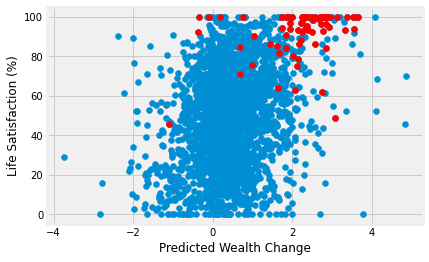

In [105]:
plt.scatter(by_country_psu['Predicted Wealth Change'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Predicted Wealth Change'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Predicted Wealth Change');
plt.ylabel('Life Satisfaction (%)');

Figure 24. Scatterplot of predicted wealth change and life satisfaction on the PSU level.

In [106]:
correlation(by_country_psu['Predicted Wealth Change'], by_country_psu['Life Satisfaction (%)'])

0.3094484752008106

In [107]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Predicted Wealth Change'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.2869977273205191

There are stronger positive correlations between changes in perceived wealth up to now (perhaps a proxy for perceived progress) and life satisfaction, and between predicted changes in wealth (perhaps a proxy for future hope) and life satisfaction, than there is between perceived present wealth and life satisfaction.

Another measure for progress is how our lives compare to those of our parents, which may also factor in people's assessments of their life satisfaction.

In [108]:
# Exclusions

parents_exclusions = [np.nan, -97, -98]

# Criteria

parents_criteria = [4, 5]

In [109]:
by_country_psu['Better than parents (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Parents', parents_exclusions, parents_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447


Table 21. Levels of feeling having done better than one's parents in PSUs.

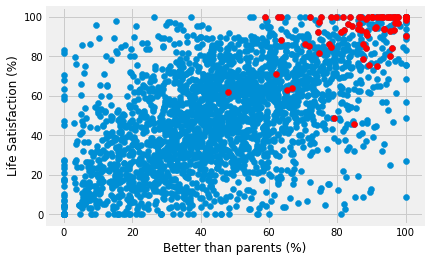

In [110]:
plt.scatter(by_country_psu['Better than parents (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Better than parents (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Better than parents (%)');
plt.ylabel('Life Satisfaction (%)');

Figure 25. Scatterplot of level of bettering one's parents and life satisfaction on the PSU level.

In [111]:
correlation(by_country_psu['Better than parents (%)'], by_country_psu['Life Satisfaction (%)'])

0.5574409741025526

In [112]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Better than parents (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.4063037158698901

Thinking that one has done better in life than one's parents is the strongest predictor so far of current life satisfaction at the PSU level.

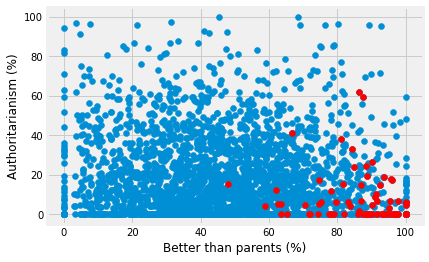

In [113]:
plt.scatter(by_country_psu['Better than parents (%)'], by_country_psu['Authoritarianism (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Better than parents (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'], c = 'red')
plt.xlabel('Better than parents (%)');
plt.ylabel('Authoritarianism (%)');

Figure 25. Scatterplot of level of bettering one's parents and preference for authoritarianism on the PSU level.

In [114]:
correlation(by_country_psu['Better than parents (%)'], by_country_psu['Authoritarianism (%)'])

-0.053873466357076176

In [115]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Better than parents (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'])

-0.14043074028102434

In [116]:
# Exclusions

employment_exclusions = []

# Criteria

employment_criteria = [1]

In [117]:
by_country_psu['Employment (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Employment', employment_exclusions, employment_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141


Table 22. Employment levels in PSUs.

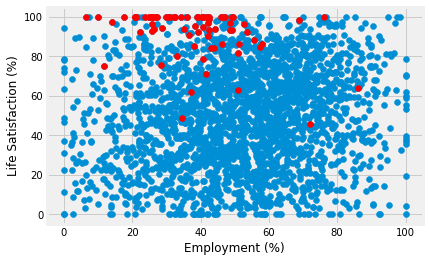

In [118]:
plt.scatter(by_country_psu['Employment (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Employment (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Employment (%)');
plt.ylabel('Life Satisfaction (%)');

Figure 26. Scatterplot of employment levels and life satisfaction on the PSU level.

In [119]:
correlation(by_country_psu['Employment (%)'], by_country_psu['Life Satisfaction (%)'])

0.09258160557125877

In [120]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Employment (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

-0.33328024243068227

While overall there is no correlation between employment and life satisfaction, for Uzbek PSUs, it seems firstly, that there is relatively low employment, and secondly, that they are happy despite this.

In [121]:
# Exclusions

health_exclusions = [np.nan, -97]

# Criteria

health_criteria = [1, 2]

In [122]:
by_country_psu['Good health (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Health', health_exclusions, health_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000


Table 23. Levels of good health in PSUs.

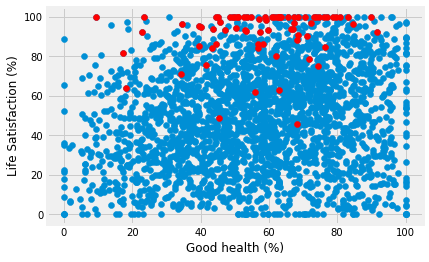

In [123]:
plt.scatter(by_country_psu['Good health (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Good health (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Good health (%)');
plt.ylabel('Life Satisfaction (%)');

Figure 27. Scatterplot of level of good health and life satisfaction on the PSU level.

In [124]:
correlation(by_country_psu['Good health (%)'], by_country_psu['Life Satisfaction (%)'])

0.17662513756395895

In [125]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Good health (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.18435082315232673

Perhaps surprisingly, there is only a weak positive correlation between having good health and feeling satisfied in life.

In [126]:
# Exclusions

education_exclusions = [np.nan]

In [127]:
by_country_psu['Education level'] = by_country_psu[['Country', 'PSU']].apply(calc_mean_psu, axis=1, args=(lits_2016, 'Education', education_exclusions))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874


Table 24. Mean education levels in PSUs.

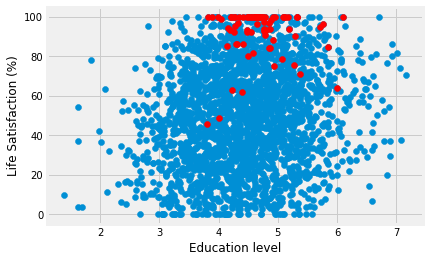

In [128]:
plt.scatter(by_country_psu['Education level'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Education level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Education level');
plt.ylabel('Life Satisfaction (%)');

Figure 28. Scatterplot of level of education and life satisfaction on the PSU level.

In [129]:
correlation(by_country_psu['Education level'], by_country_psu['Life Satisfaction (%)'])

0.15858787818019005

In [130]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Education level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.04002353852857889

Both the poorly and well educated lead satisfying and unsatisfying lives.

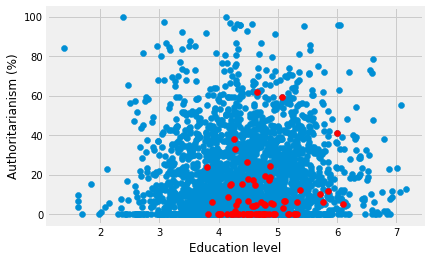

In [131]:
plt.scatter(by_country_psu['Education level'], by_country_psu['Authoritarianism (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Education level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'], c = 'red')
plt.xlabel('Education level');
plt.ylabel('Authoritarianism (%)');

Figure 29. Scatterplot of level of education and preference for authoritarianism on the PSU level.

In [132]:
correlation(by_country_psu['Education level'], by_country_psu['Authoritarianism (%)'])

0.055587323046276386

In [133]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Education level'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Authoritarianism (%)'])

0.09424652330269315

Similarly, there are those among the poorly and well educated who favour and oppose authoritarianism.

In [134]:
# Exclusions

religious_exclusions = [-99, '']

# Criteria

religious_criteria = [2, 3, 4, 5, 6, 7, 8]

In [135]:
by_country_psu['Religious (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Religious', religious_exclusions, religious_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),Wealth Level,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level,Religious (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,4.763933,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476,100.0
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,4.206326,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027,100.0
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,6.284646,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380,100.0
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,6.060834,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320,100.0
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,6.563120,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874,100.0


Table 25. Religiousness in PSUs.

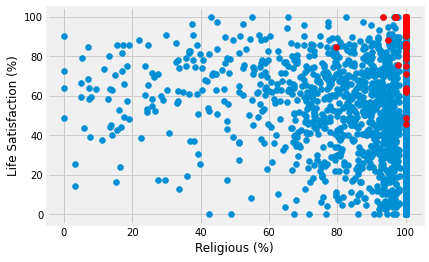

In [136]:
plt.scatter(by_country_psu['Religious (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Religious (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Religious (%)');
plt.ylabel('Life Satisfaction (%)');

Figure 30. Scatterplot of level of religiousness and life satisfaction on the PSU level.

In [137]:
correlation(by_country_psu['Religious (%)'], by_country_psu['Life Satisfaction (%)'])

-0.13545483038885944

In [138]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Religious (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.03603700797715186

In [139]:
# Exclusions

trust_general_exclusions = [-91, '']

# Criteria

trust_general_criteria = [4, 5]

In [140]:
by_country_psu['Generally Trusting (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Trust General', trust_general_exclusions, trust_general_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),...,Past Wealth Level,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level,Religious (%),Generally Trusting (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,...,5.538097,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476,100.0,0.000000
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,...,5.671763,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027,100.0,0.000000
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,...,6.236851,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380,100.0,0.000000
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,...,6.500796,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320,100.0,22.511566
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,...,6.700014,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874,100.0,0.000000


Table 26. Levels of general trust in PSUs.

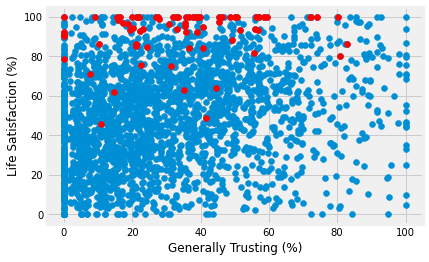

In [141]:
plt.scatter(by_country_psu['Generally Trusting (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Generally Trusting (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Generally Trusting (%)');
plt.ylabel('Life Satisfaction (%)');

Figure 31. Scatterplot of level of general trust and life satisfaction on the PSU level.

In [142]:
correlation(by_country_psu['Generally Trusting (%)'], by_country_psu['Life Satisfaction (%)'])

0.2357521840668144

In [143]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Generally Trusting (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.16889493029969438

In [144]:
# Exclusions

trust_neighbourhood_exclusions = [-97, -98, '']

# Criteria

trust_neighbourhood_criteria = [4, 5]

In [145]:
by_country_psu['Trusting Neighbourhood (%)'] = by_country_psu[['Country', 'PSU']].apply(calc_percentage_psu, axis=1, args=(lits_2016, 'Trust Neighbourhood', trust_neighbourhood_exclusions, trust_neighbourhood_criteria))
by_country_psu.head()

,Country,PSU,Count,Life Satisfaction (%),Authoritarianism (%),Mean age,Socialising (%),Monthly Income (LCU),PPP,Monthly Income ($),...,Past Wealth Change,Predicted Wealth Level,Predicted Wealth Change,Better than parents (%),Employment (%),Good health (%),Education level,Religious (%),Generally Trusting (%),Trusting Neighbourhood (%)
0,Albania,1,20,22.923973,59.506502,37.532303,10.254827,42645.758291,42.385879,1006.131267,...,-0.774163,5.461037,0.697104,19.190929,50.897336,67.083620,4.152476,100.0,0.000000,48.599040
1,Albania,2,20,33.530334,63.421760,43.484388,20.265955,44107.418906,42.385879,1040.615879,...,-1.465437,5.518725,1.312399,33.530334,36.899895,19.144211,4.328027,100.0,0.000000,59.576569
2,Albania,3,20,83.029105,95.903399,41.648407,100.000000,1616.997203,42.385879,38.149432,...,0.047795,7.621887,1.337241,76.539103,65.264971,73.892393,6.016380,100.0,0.000000,79.559725
3,Albania,4,20,81.967024,95.634206,48.774807,100.000000,135.302567,42.385879,3.192161,...,-0.439961,7.875835,1.815001,69.096419,59.140694,88.907681,6.046320,100.0,22.511566,80.953657
4,Albania,5,20,97.047925,95.375235,41.106053,100.000000,70.126749,42.385879,1.654484,...,-0.136894,8.819036,2.255916,92.833447,88.086141,100.000000,5.435874,100.0,0.000000,71.901382


Table 27. Levels of trust in neighbourhood in PSUs.

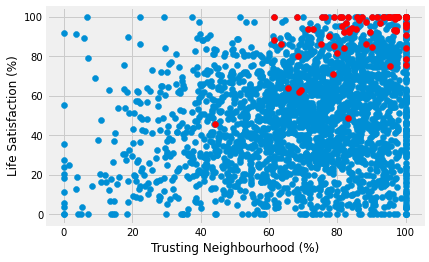

In [146]:
plt.scatter(by_country_psu['Trusting Neighbourhood (%)'], by_country_psu['Life Satisfaction (%)']);
plt.scatter(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Trusting Neighbourhood (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'], c = 'red')
plt.xlabel('Trusting Neighbourhood (%)');
plt.ylabel('Life Satisfaction (%)');

Figure 32. Scatterplot of level of neighbourhood trust and life satisfaction on the PSU level.

In [147]:
correlation(by_country_psu['Trusting Neighbourhood (%)'], by_country_psu['Life Satisfaction (%)'])

0.23564636432717467

In [148]:
correlation(by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Trusting Neighbourhood (%)'], by_country_psu[by_country_psu['Country'] == 'Uzbekistan']['Life Satisfaction (%)'])

0.49206952979836915

Again, on the PSU level, the general pattern is of greater trust in the neighbourhood, which correlates moderately with life satisfaction for Uzbek PSUs.

Having explored the correlations between several variables and life satisfaction, we see that some are better predictors than others. Specifically, bettering parents is a good predictor across the board; trusting one's neighbourhood is a good predictor of life satisfaction on the country level and for Uzbek PSUs. Predicted wealth change is a moderate predictor on the PSU level. We next use multiple linear regression to see if we can do better by considering multiple variables at the same time for predicting life satisfaction at the country and PSU levels.

In [264]:
# Create a copy of the by_country dataframe but drop all rows that have NaN values (which could have come about if, for example, all respondents in a PSU refused to answer a certain question).
by_country_no_nan = by_country.copy().dropna()
N = len(by_country_no_nan)
half_N = int(N / 2)
# Shuffle data frame by taking random sample with same number of rows.
shuffled_by_country = by_country_no_nan.sample(n=N, replace=False)
train = shuffled_by_country.iloc[:half_N]
test = shuffled_by_country.iloc[half_N:]
print(len(train), 'training and', len(test), 'test instances.')

16 training and 17 test instances.


In [265]:
columns_to_drop = ['Country', 'Life Satisfaction (%)']
# Columns kept: 'Urban (%)', 'Religious (%)', 'Better than parents (%)', 'Generally Trusting (%)', 'Trusting Neighbourhood (%)', 'Wealth Level'

In [266]:
def predict(slopes, row):
    return np.sum(slopes * np.array(row))

example_row = test.drop(columns = columns_to_drop).iloc[0]
example_slopes = np.random.normal(1, 1, len(example_row))
train_satisfaction = train['Life Satisfaction (%)']
train_attributes = train.drop(columns = columns_to_drop)

In [267]:
def rmse(slopes, attributes, y_values):
    errors = []
    for i in np.arange(len(y_values)):
        predicted = predict(slopes, attributes.iloc[i])
        actual = y_values.iloc[i]
        errors.append((actual - predicted) ** 2)
    return np.sqrt(np.mean(errors))

def rmse_train(slopes, train_attributes, train_satisfaction):
    return rmse(slopes, train_attributes, train_satisfaction)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes, train_attributes, train_satisfaction))

RMSE of all training examples using random slopes: 465.66319252062425


In [268]:
def rmse_fast(slopes, attributes, y_values):
    # Make an n by s array of slopes by copying the s slopes array n times.
    slopes_array = np.tile(slopes, [len(y_values), 1])
    # Multiply the n by s array by the corresponding attributes.
    predicted = np.sum(slopes_array * attributes, axis=1)
    errors = y_values - predicted
    return np.sqrt(np.mean(errors ** 2))

def rmse_train_fast(slopes, train_attributes, train_satisfaction):
    return rmse_fast(slopes, train_attributes, train_satisfaction)

In [269]:
from scipy.optimize import minimize

In [270]:
# Use minimize to calculate smallest RMSE slopes.
multi_res = minimize(rmse_train_fast, example_slopes, args=(train_attributes, train_satisfaction))
best_slopes = multi_res.x
best_slopes

array([ 0.03131051, -0.33086069,  0.80023065,  0.10736361,  0.46149515,
        1.73607312])

In [271]:
test_satisfaction = test['Life Satisfaction (%)']
test_attributes = test.drop(columns = columns_to_drop)

def rmse_test(slopes, test_attributes, test_satisfaction):
    return rmse(slopes, test_attributes, test_satisfaction)

rmse_linear = rmse_test(best_slopes, test_attributes, test_satisfaction)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 9.16654549468586


0.8688844251015886

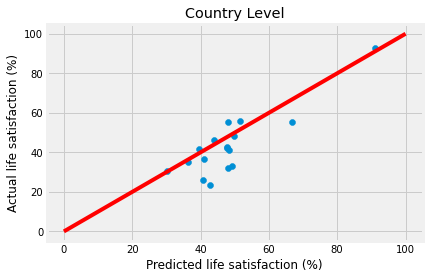

In [272]:
def fit(row, best_slopes):
    return sum(best_slopes * np.array(row))

fitted = test_attributes.apply(fit, axis=1, args=(best_slopes,))
plt.scatter(fitted, test_satisfaction);
# Plot x=y line.
plt.plot([0, 100], [0, 100], color='red');
plt.xlabel('Predicted life satisfaction (%)');
plt.ylabel('Actual life satisfaction (%)');
plt.title('Country Level')
correlation(fitted, test_satisfaction)

Figure 33. Actual life satisfaction as a function of life satisfaction as predicted by the multiple regression model on the country level.

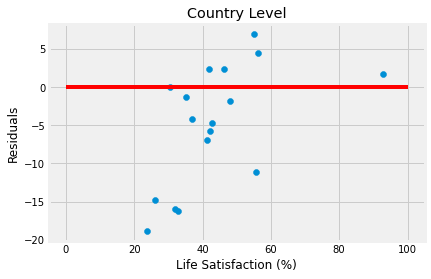

In [273]:
# Plot the residuals
plt.scatter(test_satisfaction, test_satisfaction - fitted);
plt.plot([0, 100], [0, 0], color='red');
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Residuals');
plt.title('Country Level');

Figure 34. The residuals of the multiple regression on the country level.

The correlation between predicted life satisfaction and actual life satisfaction on the country level (0.87) surpassed the individual correlations we saw earlier (maximum 0.75), showing that consideration of multiple factors improves prediction. However, the residuals plot (Figure 34) shows some overestimating of the actual values.

In [274]:
# Create a copy of the by_country_psu dataframe but drop all rows that have NaN values.
by_country_psu_no_nan = by_country_psu.copy().dropna()
N = len(by_country_psu_no_nan)
half_N = int(N / 2)
# Shuffle data frame by taking random sample with same number of rows.
shuffled_by_country_psu = by_country_psu_no_nan.sample(n=N, replace=False)
train = shuffled_by_country_psu.iloc[:half_N]
test = shuffled_by_country_psu.iloc[half_N:]
print(len(train), 'training and', len(test), 'test instances.')

1265 training and 1266 test instances.


In [275]:
columns_to_drop = ['Country', 'PSU', 'Count', 'Life Satisfaction (%)', 'Authoritarianism (%)', 'Mean age', 'Socialising (%)', 'Monthly Income (LCU)', 'PPP', 'Monthly Income ($)', 'Past Wealth Level', 'Predicted Wealth Level', 'Education level', 'Employment (%)', 'Good health (%)', 'Religious (%)']
# Columns kept: 'Past Wealth Change', 'Predicted Wealth Change', 'Better than parents (%)', 'Wealth Level', 'Generally Trusting (%)', 'Trusting Neighbourhood (%)'

In [276]:
example_row = test.drop(columns = columns_to_drop).iloc[0]
example_slopes = np.random.normal(1, 1, len(example_row))
train_satisfaction = train['Life Satisfaction (%)']
train_attributes = train.drop(columns = columns_to_drop)
print('RMSE of all training examples using random slopes:', rmse_train(example_slopes, train_attributes, train_satisfaction))

RMSE of all training examples using random slopes: 340.1545539298082


In [277]:
# Use minimize to calculate smallest RMSE slopes.
multi_res = minimize(rmse_train_fast, example_slopes, args=(train_attributes, train_satisfaction))
best_slopes = multi_res.x
best_slopes

test_satisfaction = test['Life Satisfaction (%)']
test_attributes = test.drop(columns = columns_to_drop)

rmse_linear = rmse_test(best_slopes, test_attributes, test_satisfaction)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 20.128270970056192


0.6302352476641745

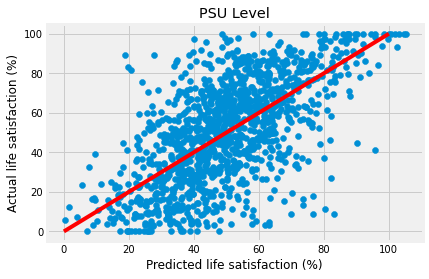

In [278]:
fitted = test_attributes.apply(fit, axis=1, args=(best_slopes,))
plt.scatter(fitted, test_satisfaction);
# Plot x=y line.
plt.plot([0, 100], [0, 100], color='red');
plt.xlabel('Predicted life satisfaction (%)');
plt.ylabel('Actual life satisfaction (%)');
plt.title('PSU Level');
correlation(fitted, test_satisfaction)

Figure 35. Actual life satisfaction as a function of life satisfaction as predicted by the multiple regression model on the PSU level.

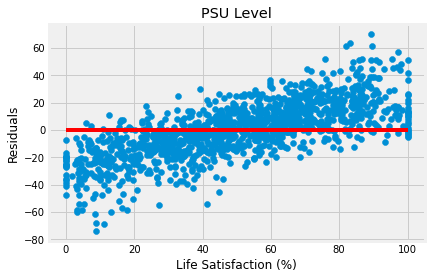

In [279]:
# Plot the residuals
plt.scatter(test_satisfaction, test_satisfaction - fitted);
plt.plot([0, 100], [0, 0], color='red');
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Residuals');
plt.title('PSU Level');

Figure 36. The residuals of the multiple regression on the PSU level.

Again, the multiple regression model does a better job of predicting life satisfaction than any individual factor. It achieved a correlation of 0.63 whereas the highest individual variable correlation was 0.56. Here, the residuals plot (Figure 36) shows underestimating for higher values of life satisfaction and overestimating for lower values.

In [298]:
# Create a copy of the by_country_psu dataframe for Uzbekistan only but drop all rows that have NaN values.
by_country_psu_uzbekistan_no_nan = by_country_psu[by_country_psu['Country'] == 'Uzbekistan'].copy().dropna()
N = len(by_country_psu_uzbekistan_no_nan)
half_N = int(N / 2)
# Shuffle data frame by taking random sample with same number of rows.
shuffled_by_country_psu = by_country_psu_uzbekistan_no_nan.sample(n=N, replace=False)
train = shuffled_by_country_psu.iloc[:half_N]
test = shuffled_by_country_psu.iloc[half_N:]
print(len(train), 'training and', len(test), 'test instances.')

37 training and 38 test instances.


In [299]:
columns_to_drop = ['Country', 'PSU', 'Count', 'Life Satisfaction (%)', 'Authoritarianism (%)', 'Mean age', 'Monthly Income (LCU)', 'PPP', 'Monthly Income ($)', 'Wealth Level', 'Past Wealth Level', 'Past Wealth Change', 'Predicted Wealth Level', 'Good health (%)', 'Education level', 'Religious (%)', 'Generally Trusting (%)']
# Columns kept: 'Socialising (%)', 'Predicted Wealth Change', 'Better than parents (%)', 'Employment (%)', 'Trusting Neighbourhood (%)'

In [300]:
example_row = test.drop(columns = columns_to_drop).iloc[0]
example_slopes = np.random.normal(1, 1, len(example_row))
train_satisfaction = train['Life Satisfaction (%)']
train_attributes = train.drop(columns = columns_to_drop)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes, train_attributes, train_satisfaction))

RMSE of all training examples using random slopes: 96.90294037327372


In [301]:
# Use minimize to calculate smallest RMSE slopes.
multi_res = minimize(rmse_train_fast, example_slopes, args=(train_attributes, train_satisfaction))
best_slopes = multi_res.x
best_slopes

test_satisfaction = test['Life Satisfaction (%)']
test_attributes = test.drop(columns = columns_to_drop)

rmse_linear = rmse_test(best_slopes, test_attributes, test_satisfaction)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 10.766285697041983


0.5562910214656962

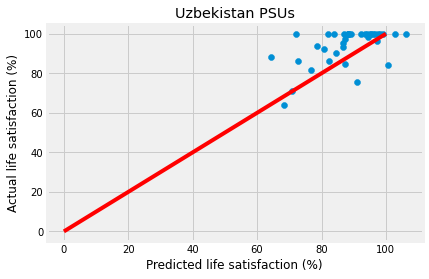

In [302]:
fitted = test_attributes.apply(fit, axis=1, args=(best_slopes,))
plt.scatter(fitted, test_satisfaction);
# Plot x=y line.
plt.plot([0, 100], [0, 100], color='red');
plt.xlabel('Predicted life satisfaction (%)');
plt.ylabel('Actual life satisfaction (%)');
plt.title('Uzbekistan PSUs')
correlation(fitted, test_satisfaction)

Figure 37. Actual life satisfaction as a function of life satisfaction as predicted by the multiple regression model for Uzbekistan on the PSU level.

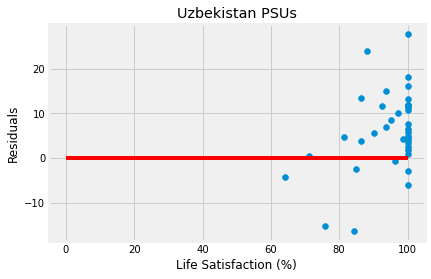

In [303]:
# Plot the residuals
plt.scatter(test_satisfaction, test_satisfaction - fitted);
plt.plot([0, 100], [0, 0], color='red');
plt.xlabel('Life Satisfaction (%)');
plt.ylabel('Residuals');
plt.title('Uzbekistan PSUs');

Figure 38. The residuals of the multiple regression for Uzbekistan on the PSU level.

The multiple regression for Uzbek PSUs shows marginal improvement on individual correlations; however, there is systematic underestimating of life satisfaction, which may partly reflect a ceiling effect of repeatedly high life satisfactions.

The common thread through these three models is the feeling of having done better than one’s parents, which may tap into a belief in progress; and being able to trust others, especially one’s neighbourhood in the case of Uzbekistan.

# Interim conclusions

In conclusion, on average, people in the Eastern Bloc are less satisfied than those in Western European countries. However, only two comparator countries were used; inclusion of a wider range of countries may have altered this happiness gap. Secondly, there is some evidence on the country level that the more satisfied you are, the less likely you are to support authoritarian forms of government. However, this is a correlation, so we cannot say that one causes the other. Nevertheless, a possible reason for this relationship is that the loss of certain freedoms under authoritarianism leads to popular disaffection. However, the wording of the questionnaire meant that one could be a supporter of democracy in general and still choose the authoritarian option. Perhaps if the statement had read “authoritarianism is preferable to any other form of political system”, there would have been a clearer relationship between life satisfaction and leanings towards authoritarianism.

The highest mean life satisfaction of all surveyed countries was in Uzbekistan (93%). Uzbekistan’s high life satisfaction correlated with high trust in neighbourhood, feelings of having done better than one’s parents, and optimism about future wealth, despite relatively low employment. Trust and bettering parents generalised to the PSU and country levels, too.

Selection of variables at present was guided by previous literature, but could have missed some alternative good predictors of life satisfaction. Future extensions of this work could expand the list of variables, perhaps searching through them systematically and/or algorithmically.

# References

EBRD. (2016). *Life in transition: A decade of measuring transition*. Retrieved from https://www.ebrd.com/documents/oce/pdf-life-in-transition-iii.pdf.

Hackett, C., Grim, B., Stonawski, M., Skirbekk, V., Potančoková, M., & Abel, G. (2012). The global religious landscape. *Washington, DC: Pew Research Center*.

Helliwell, J. F., Shiplett, H., & Barrington-Leigh, C. P. (2019). How happy are your neighbours? Variation in life satisfaction among 1200 Canadian neighbourhoods and communities. *PloS One*, *14*(1), e0210091.

Prezza, M., & Costantini, S. (1998). Sense of community and life satisfaction: Investigation in three different territorial contexts. *Journal of Community & Applied Social Psychology*, *8*(3), 181-194.

Reuters. (2016). Unhappy Russians nostalgic for Soviet-style rule – study. *The Guardian*. Retrieved from https://www.theguardian.com/world/2016/dec/14/unhappy-russians-nostalgic-for-soviet-style-rule-study.

Steger, M. F., & Frazier, P. (2005). Meaning in life: One link in the chain from religiousness to well-being. *Journal of Counseling Psychology*, *52*(4), 574-582.